<a href="https://colab.research.google.com/github/Fcazarez/UML_triage_with_DBSCAN/blob/main/FC_Ass_3_DBSCAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Machine Learning**
# **Assignment 3 - Patient triage with DBSCAN**
# **Felix Cazarez**


### **Objective:**
Based on patient symptoms, categorize patients according to how urgently they need medical care, with a particular importance placed on identifying all patients needing immediate resuscitation.  

**Data:**

Obtained from *Patient Priority for Clustering | Kaggle*, created by Hossam Ahmed Aly; original source of data unknown.

**Problem Statement:**

Triage is the prioritization of patient care (or victims during a disaster) based on illness/injury, symptoms, severity, prognosis, and resource availability. The purpose of triage is to identify patients needing immediate resuscitation, to help assign patients to a predesignated patient care area, and to initiate diagnostic/therapeutic measures as appropriate. Your job as a data scientist is to cluster the patients according to their symptoms and identify the level of urgency for each group; it is important to identify all patients needing immediate resuscitation.



```
# This is formatted as code
```

## **1.Data Part a)**
* Load patient_priority.csv into a pandas dataframe. Drop the 'triage' column and print out the header.
* Use pandas.DataFrame.describe to summarize the data.
* Using markdown, explain the meaning of each column and make observations about the dataset.


In [ ]:
# import libraries
#Basic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors


In [ ]:
# read the file
url = "https://raw.githubusercontent.com/Fcazarez/UML_triage_with_DBSCAN/main/patient_priority.csv"
df = pd.read_csv(url)
df = df.drop('triage', axis= 1)     # drop tags since we are performing unsupervised ML
df = df.drop('Unnamed: 0', axis= 1)    # not adding value
df.head().T


0             1             2             3  \
age                        40.0          49.0          37.0          48.0   
gender                      1.0           0.0           1.0           0.0   
chest pain type             2.0           3.0           2.0           4.0   
blood pressure            140.0         160.0         130.0         138.0   
cholesterol               294.0         180.0         294.0         214.0   
max heart rate            172.0         156.0         156.0         156.0   
exercise angina             0.0           0.0           0.0           1.0   
plasma glucose            108.0          75.0          98.0          72.0   
skin_thickness             43.0          47.0          53.0          51.0   
insulin                    92.0          90.0         102.0         118.0   
bmi                        19.0          18.0          23.0          18.0   
diabetes_pedigree      0.467386      0.467386      0.467386      0.467386   
hypertension                0.0           0.0           0.0           0.0   
heart_disease               0.0           0.0           0.0           0.0   
Residence_type            Urban         Urban         Urban         Urban   
smoking_status     never smoked  never smoked  never smoked  never smoked   

                              4  
age                        54.0  
gender                      1.0  
chest pain type             3.0  
blood pressure            150.0  
cholesterol               195.0  
max heart rate            156.0  
exercise angina             0.0  
plasma glucose            108.0  
skin_thickness             90.0  
insulin                    83.0  
bmi                        21.0  
diabetes_pedigree      0.467386  
hypertension                0.0  
heart_disease               0.0  
Residence_type            Urban  
smoking_status     never smoked

In [ ]:
df.describe().T.round(2)

count    mean    std     min     25%     50%     75%  \
age                6962.0   57.45  11.90   28.00   48.00   56.00   66.00   
gender             6961.0    0.53   0.50    0.00    0.00    1.00    1.00   
chest pain type    6962.0    0.53   1.25    0.00    0.00    0.00    0.00   
blood pressure     6962.0  109.63  21.53   60.00   92.00  111.00  127.00   
cholesterol        6962.0  184.71  32.01  150.00  164.00  179.00  192.00   
max heart rate     6962.0  163.50  15.46  138.00  150.00  163.00  177.00   
exercise angina    6962.0    0.06   0.24    0.00    0.00    0.00    0.00   
plasma glucose     6962.0   98.39  28.60   55.12   78.71   93.00  111.63   
skin_thickness     6962.0   56.81  22.89   21.00   36.00   55.00   77.00   
insulin            6962.0  111.09  17.47   81.00   97.00  111.00  125.00   
bmi                6962.0   27.19   7.36   10.30   21.80   26.20   31.00   
diabetes_pedigree  6962.0    0.47   0.10    0.08    0.47    0.47    0.47   
hypertension       6962.0    0.07   0.26    0.00    0.00    0.00    0.00   
heart_disease      6962.0    0.04   0.19    0.00    0.00    0.00    0.00   

                      max  
age                 82.00  
gender               1.00  
chest pain type      4.00  
blood pressure     165.00  
cholesterol        294.00  
max heart rate     202.00  
exercise angina      1.00  
plasma glucose     199.00  
skin_thickness      99.00  
insulin            171.00  
bmi                 66.80  
diabetes_pedigree    2.42  
hypertension         1.00  
heart_disease        1.00

### **Features description:**
**Age:** Age can be an important factor in triage because certain medical conditions and their severity can vary with age. Pediatric and geriatric patients, for example, may have different needs and may require special attention.

**Gender:** Gender may play a role in triage for specific conditions or symptoms that affect one gender more than the other. For example, certain cardiac symptoms may manifest differently in men and women.

**Chest Pain Type:** Different types of chest pain may indicate varying levels of urgency. For instance, sharp, severe chest pain could suggest a more critical condition compared to mild discomfort.

**Blood Pressure:** Blood pressure is a critical vital sign used in triage. Extremely high or low blood pressure can indicate severe medical conditions, such as hypertensive crises or shock.

**Cholesterol:** While cholesterol levels may not be directly used in triage, they can be relevant for patients with a history of heart disease or risk factors. High cholesterol may indicate a higher risk of cardiovascular events.

**Max Heart Rate:** A high maximum heart rate may be a sign of cardiac stress or other medical issues. It can be used to assess the severity of symptoms related to heart problems.

**Exercise Angina:** Exercise-induced angina can be a concerning symptom, especially for individuals with known heart conditions. It suggests a potential cardiac issue, warranting immediate attention.

**Plasma Glucose:** Elevated plasma glucose levels may indicate uncontrolled diabetes or other metabolic issues. This can be relevant in patients with diabetes who may require immediate treatment for hyperglycemia.

**Skin Thickness:** Skin thickness may not be a direct triage factor, but it can be related to conditions like edema or fluid retention, which may be relevant in certain cases.

**Insulin:** Insulin levels can be important for diabetic patients. High or low insulin levels can indicate issues with blood sugar control and may require rapid intervention.

**BMI (Body Mass Index):** BMI can be an indicator of obesity, which can contribute to a variety of health issues. It can be relevant when assessing patients with obesity-related complaints.

**Diabetes Pedigree:** This variable may not have a direct role in triage, but it can provide information about a patient's family history of diabetes, which can be relevant for understanding potential genetic factors.

**Hypertension:** The presence of hypertension may indicate an acute hypertensive crisis or a history of high blood pressure, which can lead to complications such as stroke or heart attack.

**Heart Disease:** The presence of heart disease is a significant factor in triage. Patients with a known history of heart disease or symptoms of acute cardiac events require immediate attention.

**Analysis of each feature vs normal values (cuantitative):**

| Feature | Description | Normal Levels for a Healthy Person |
| --- | --- | --- |
| Age | Age of the patient. | Varies with each individual. |
| Gender | Gender of the patient (0 for female, 1 for male). | Not applicable. |
| Chest Pain Type | Type of chest pain experienced by the patient (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic, 4: unknown). | Ideally, no chest pain (0: typical angina). |
| Blood Pressure | Resting blood pressure of the patient in mm Hg. | Ideally between 90/60mmHg and 120/80mmHg. |
| Cholesterol | Serum cholesterol in mg/dl. | Less than 200 mg/dL. |
| Max Heart Rate | Maximum heart rate achieved by the patient. | Depends on age, roughly estimated as 220 minus age. |
| Exercise Angina | Exercise-induced angina (0: no, 1: yes). | Ideally no exercise-induced angina (0: no). |
| Plasma Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test in mg/dl. | Less than 140 mg/dL. |
| Skin Thickness | Triceps skin fold thickness in mm. | Varies with each individual. |
| Insulin | Insulin level in mIU/L. | Varies, but generally between 2-27 mIU/L. |
| BMI | Body Mass Index of the patient. | Ideally between 18.5 - 24.9 kg/m². |
| Diabetes Pedigree Function | Diabetes pedigree function (a function that scores likelihood of diabetes based on family history). | Lower scores are better, typically below 1. |
| Hypertension | Hypertension (0: no, 1: yes). | Ideally no hypertension (0: no). |
| Heart Disease | Heart disease (0: no, 1: yes). | Ideally no heart disease (0: no). |



**Ranking for each feature in a triage process**

| Rank | Variable                     | Comments                                           |
|------|------------------------------|---------------------------------------------------|
| 1    | Chest Pain Type              | Strong indicator of potential cardiac issues.     |
| 2    | Max Heart Rate               | Higher heart rate could indicate stress or risk.  |
| 3    | Heart Disease                | Critical if present, requiring immediate care.    |
| 4    | Exercise Angina              | Indicates heart stress during physical activity.  |
| 5    | Blood Pressure               | Vital sign, important for assessing circulatory health. |
| 6    | Cholesterol                  | May contribute to heart-related conditions.       |
| 7    | Plasma Glucose               | Elevated levels may suggest diabetic complications. |
| 8    | Insulin                      | Relevant for diabetes management and monitoring.  |
| 9    | Age                          | Age can influence triage decisions and treatment plans. |
| 10   | Diabetes Pedigree Function   | Provides insights into the genetic risk of diabetes. |
| 11   | Hypertension                 | High blood pressure is an important consideration. |
| 12   | BMI (Body Mass Index)        | Obesity may impact patient management strategies. |
| 13   | Skin Thickness               | May be relevant for skin-related conditions.      |
| 14   | Gender                       | Gender-specific healthcare considerations.        |

*Source: Adapted from clinical expertise and domain knowledge in emergency medicine.*


## **1.Data Part b)**
* Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values.
* Use pandas.DataFrame.duplicates to check for duplicate entries.
* Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types.
* Use markdown to make observations and explain what you have done.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6962 non-null   float64
 1   gender             6961 non-null   float64
 2   chest pain type    6962 non-null   float64
 3   blood pressure     6962 non-null   float64
 4   cholesterol        6962 non-null   float64
 5   max heart rate     6962 non-null   float64
 6   exercise angina    6962 non-null   float64
 7   plasma glucose     6962 non-null   float64
 8   skin_thickness     6962 non-null   float64
 9   insulin            6962 non-null   float64
 10  bmi                6962 non-null   float64
 11  diabetes_pedigree  6962 non-null   float64
 12  hypertension       6962 non-null   float64
 13  heart_disease      6962 non-null   float64
 14  Residence_type     6962 non-null   object 
 15  smoking_status     6962 non-null   object 
dtypes: float64(14), object(2

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6961
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6961 non-null   float64
 1   gender             6961 non-null   float64
 2   chest pain type    6961 non-null   float64
 3   blood pressure     6961 non-null   float64
 4   cholesterol        6961 non-null   float64
 5   max heart rate     6961 non-null   float64
 6   exercise angina    6961 non-null   float64
 7   plasma glucose     6961 non-null   float64
 8   skin_thickness     6961 non-null   float64
 9   insulin            6961 non-null   float64
 10  bmi                6961 non-null   float64
 11  diabetes_pedigree  6961 non-null   float64
 12  hypertension       6961 non-null   float64
 13  heart_disease      6961 non-null   float64
 14  Residence_type     6961 non-null   object 
 15  smoking_status     6961 non-null   object 
dtypes: float64(14), object(2

**Comments: Feature, Current data type, suggested to be changed, and the reason which support it:**

| Feature           | Current Data Type | Suggested Data Type | Reason                                |
|-------------------|-------------------|---------------------|-------------------------------------------------------|
| age               | float64           | integer             | Age has discrete values and should be an integer.    |
| gender            | float64           | integer             | Gender can be represented as an integer (e.g., 0/1). |
| chest pain type   | float64           | integer             | Chest pain type can be represented as an integer.    |
| blood pressure    | float64           | integer             | Blood pressure can be represented as an integer.     |
| cholesterol       | float64           | integer             | Cholesterol levels can be rounded to integers.       |
| max heart rate    | float64           | integer             | Max heart rate can be represented as an integer.      |
| exercise angina   | float64           | integer             | Exercise angina can be represented as an integer.     |
| plasma glucose    | float64           | float 64             | Plasma glucose levels has continuous vaues.    |
| skin_thickness    | float64           | integer             | Skin thickness can be represented as an integer.     |
| insulin           | float64           | float64             | Insulin levels has continuous values.           |
| bmi               | float64           | float64             | BMI has continuous values.                |
| diabetes_pedigree | float64           | float64             | No change required; it's already a float, and continuous value.            |
| hypertension      | float64           | integer             | Hypertension can be represented as an integer.       |
| heart_disease     | float64           | integer             | Heart disease can be represented as an integer.      |
| Residence_type    | object            | No change required  | Categorical data should remain as an object.         |
| smoking_status    | object            | No change required  | Categorical data should remain as an object.         |


In [ ]:
# Read the data from the URL
#url = "https://raw.githubusercontent.com/Fcazarez/UML_triage_with_DBSCAN/main/patient_priority.csv"
#df = pd.read_csv(url)

# Drop 'triage' and 'Unnamed: 0' columns
#df = df.drop(['triage', 'Unnamed: 0'], axis=1)

# Define the data types
dtypes = {
    'age': int,
    'gender': int,
    'chest pain type': int,
    'blood pressure': int,
    'cholesterol': int,
    'max heart rate': int,
    'exercise angina': int,
    'skin_thickness': int,
    'hypertension': int,
    'heart_disease': int,
    'bmi': int,
    'plasma glucose': int,
}

# Handle missing values (convert NaN to a default value, for example, -1)
#default_value = -1
#df.fillna(default_value, inplace=True)

# Apply the data type changes to the specified columns
for col, dtype in dtypes.items():
    df[col] = df[col].astype(dtype)

# Display the first 5 rows of the updated DataFrame
df.head().T



0             1             2             3  \
age                          40            49            37            48   
gender                        1             0             1             0   
chest pain type               2             3             2             4   
blood pressure              140           160           130           138   
cholesterol                 294           180           294           214   
max heart rate              172           156           156           156   
exercise angina               0             0             0             1   
plasma glucose              108            75            98            72   
skin_thickness               43            47            53            51   
insulin                    92.0          90.0         102.0         118.0   
bmi                          19            18            23            18   
diabetes_pedigree      0.467386      0.467386      0.467386      0.467386   
hypertension                  0             0             0             0   
heart_disease                 0             0             0             0   
Residence_type            Urban         Urban         Urban         Urban   
smoking_status     never smoked  never smoked  never smoked  never smoked   

                              4  
age                          54  
gender                        1  
chest pain type               3  
blood pressure              150  
cholesterol                 195  
max heart rate              156  
exercise angina               0  
plasma glucose              108  
skin_thickness               90  
insulin                    83.0  
bmi                          21  
diabetes_pedigree      0.467386  
hypertension                  0  
heart_disease                 0  
Residence_type            Urban  
smoking_status     never smoked

In [ ]:
non_cat_columns = df.select_dtypes(exclude='object').columns.tolist()
cat_columns = df.select_dtypes(include='object').columns.tolist()
df.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0   40       1                2             140          294             172   
1   49       0                3             160          180             156   
2   37       1                2             130          294             156   
3   48       0                4             138          214             156   
4   54       1                3             150          195             156   

   exercise angina  plasma glucose  skin_thickness  insulin  bmi  \
0                0             108              43     92.0   19   
1                0              75              47     90.0   18   
2                0              98              53    102.0   23   
3                1              72              51    118.0   18   
4                0             108              90     83.0   21   

   diabetes_pedigree  hypertension  heart_disease Residence_type  \
0           0.467386             0              0          Urban   
1           0.467386             0              0          Urban   
2           0.467386             0              0          Urban   
3           0.467386             0              0          Urban   
4           0.467386             0              0          Urban   

  smoking_status  
0   never smoked  
1   never smoked  
2   never smoked  
3   never smoked  
4   never smoked

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6961
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6961 non-null   int64  
 1   gender             6961 non-null   int64  
 2   chest pain type    6961 non-null   int64  
 3   blood pressure     6961 non-null   int64  
 4   cholesterol        6961 non-null   int64  
 5   max heart rate     6961 non-null   int64  
 6   exercise angina    6961 non-null   int64  
 7   plasma glucose     6961 non-null   int64  
 8   skin_thickness     6961 non-null   int64  
 9   insulin            6961 non-null   float64
 10  bmi                6961 non-null   int64  
 11  diabetes_pedigree  6961 non-null   float64
 12  hypertension       6961 non-null   int64  
 13  heart_disease      6961 non-null   int64  
 14  Residence_type     6961 non-null   object 
 15  smoking_status     6961 non-null   object 
dtypes: float64(2), int64(12)

In [ ]:
# Print the header
print(df.columns)

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type', 'smoking_status'],
      dtype='object')


In [ ]:
df = df.dropna()
df.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0   40       1                2             140          294             172   
1   49       0                3             160          180             156   
2   37       1                2             130          294             156   
3   48       0                4             138          214             156   
4   54       1                3             150          195             156   

   exercise angina  plasma glucose  skin_thickness  insulin  bmi  \
0                0             108              43     92.0   19   
1                0              75              47     90.0   18   
2                0              98              53    102.0   23   
3                1              72              51    118.0   18   
4                0             108              90     83.0   21   

   diabetes_pedigree  hypertension  heart_disease Residence_type  \
0           0.467386             0              0          Urban   
1           0.467386             0              0          Urban   
2           0.467386             0              0          Urban   
3           0.467386             0              0          Urban   
4           0.467386             0              0          Urban   

  smoking_status  
0   never smoked  
1   never smoked  
2   never smoked  
3   never smoked  
4   never smoked

In [ ]:
# Summarize the data
df.describe().T


count        mean        std      min         25%  \
age                6961.0   57.447924  11.904525   28.000   48.000000   
gender             6961.0    0.531964   0.499013    0.000    0.000000   
chest pain type    6961.0    0.529091   1.253865    0.000    0.000000   
blood pressure     6961.0  109.633530  21.534376   60.000   92.000000   
cholesterol        6961.0  184.714840  32.011288  150.000  164.000000   
max heart rate     6961.0  163.500359  15.458827  138.000  150.000000   
exercise angina    6961.0    0.061773   0.240760    0.000    0.000000   
plasma glucose     6961.0   98.031748  28.633274   55.000   78.000000   
skin_thickness     6961.0   56.809079  22.888100   21.000   36.000000   
insulin            6961.0  111.090935  17.471189   81.000   97.000000   
bmi                6961.0   26.819997   7.289118   10.000   21.000000   
diabetes_pedigree  6961.0    0.467386   0.102671    0.078    0.467386   
hypertension       6961.0    0.071541   0.257746    0.000    0.000000   
heart_disease      6961.0    0.039506   0.194809    0.000    0.000000   

                          50%         75%     max  
age                 56.000000   66.000000   82.00  
gender               1.000000    1.000000    1.00  
chest pain type      0.000000    0.000000    4.00  
blood pressure     111.000000  127.000000  165.00  
cholesterol        179.000000  192.000000  294.00  
max heart rate     163.000000  177.000000  202.00  
exercise angina      0.000000    0.000000    1.00  
plasma glucose      93.000000  111.000000  199.00  
skin_thickness      55.000000   77.000000   99.00  
insulin            111.000000  125.000000  171.00  
bmi                 26.000000   31.000000   66.00  
diabetes_pedigree    0.467386    0.467386    2.42  
hypertension         0.000000    0.000000    1.00  
heart_disease        0.000000    0.000000    1.00

In [ ]:
# Check data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6961
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6961 non-null   int64  
 1   gender             6961 non-null   int64  
 2   chest pain type    6961 non-null   int64  
 3   blood pressure     6961 non-null   int64  
 4   cholesterol        6961 non-null   int64  
 5   max heart rate     6961 non-null   int64  
 6   exercise angina    6961 non-null   int64  
 7   plasma glucose     6961 non-null   int64  
 8   skin_thickness     6961 non-null   int64  
 9   insulin            6961 non-null   float64
 10  bmi                6961 non-null   int64  
 11  diabetes_pedigree  6961 non-null   float64
 12  hypertension       6961 non-null   int64  
 13  heart_disease      6961 non-null   int64  
 14  Residence_type     6961 non-null   object 
 15  smoking_status     6961 non-null   object 
dtypes: float64(2), int64(12)

In [ ]:
# Check for duplicate entries
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

**Data Cleansing Comments:**

1. **Missing Value Handling:** An initial assessment revealed a missing value in the 'gender' feature, which has been successfully addressed and fixed. Ensuring data completeness is crucial for accurate analysis.

2. **Data Type Preservation:** The categorical features within the dataset have been intentionally left unchanged, recognizing the significance of maintaining their original data types for meaningful interpretation.

3. **Data Type Standardization:** In preparation for analysis, specific Dtype features were meticulously updated to integers. This optimization ensures consistency and enhances the data's suitability for a wide range of analytical techniques. The updated integer Dtypes include:
   - 'age'
   - 'gender'
   - 'chest pain type'
   - 'blood pressure'
   - 'cholesterol'
   - 'max heart rate'
   - 'exercise angina'
   - 'skin_thickness'
   - 'hypertension'
   - 'heart_disease'
   - 'bmi'
   - 'plasma glucose'

The dataset is now fully prepared and primed for further analysis, maintaining data integrity and reliability.


## **1.Data Part c)**
* Use pandas.get_dummies to one-hot-encode the two columns with string data.


In [ ]:
df = pd.get_dummies(df, columns=['Residence_type', 'smoking_status'], drop_first=True)


In [ ]:
df.head().T

0           1           2  \
age                              40.000000   49.000000   37.000000   
gender                            1.000000    0.000000    1.000000   
chest pain type                   2.000000    3.000000    2.000000   
blood pressure                  140.000000  160.000000  130.000000   
cholesterol                     294.000000  180.000000  294.000000   
max heart rate                  172.000000  156.000000  156.000000   
exercise angina                   0.000000    0.000000    0.000000   
plasma glucose                  108.000000   75.000000   98.000000   
skin_thickness                   43.000000   47.000000   53.000000   
insulin                          92.000000   90.000000  102.000000   
bmi                              19.000000   18.000000   23.000000   
diabetes_pedigree                 0.467386    0.467386    0.467386   
hypertension                      0.000000    0.000000    0.000000   
heart_disease                     0.000000    0.000000    0.000000   
Residence_type_Urban              1.000000    1.000000    1.000000   
smoking_status_formerly smoked    0.000000    0.000000    0.000000   
smoking_status_never smoked       1.000000    1.000000    1.000000   
smoking_status_smokes             0.000000    0.000000    0.000000   

                                         3           4  
age                              48.000000   54.000000  
gender                            0.000000    1.000000  
chest pain type                   4.000000    3.000000  
blood pressure                  138.000000  150.000000  
cholesterol                     214.000000  195.000000  
max heart rate                  156.000000  156.000000  
exercise angina                   1.000000    0.000000  
plasma glucose                   72.000000  108.000000  
skin_thickness                   51.000000   90.000000  
insulin                         118.000000   83.000000  
bmi                              18.000000   21.000000  
diabetes_pedigree                 0.467386    0.467386  
hypertension                      0.000000    0.000000  
heart_disease                     0.000000    0.000000  
Residence_type_Urban              1.000000    1.000000  
smoking_status_formerly smoked    0.000000    0.000000  
smoking_status_never smoked       1.000000    1.000000  
smoking_status_smokes             0.000000    0.000000

## **1.Data Part d)**
* Use seaborn.heatmap to display the correlation matrix of the features.
* Use seaborn.pairplot to generate scatter plots and histograms.
* Use markdown to make observations.


<Axes: >

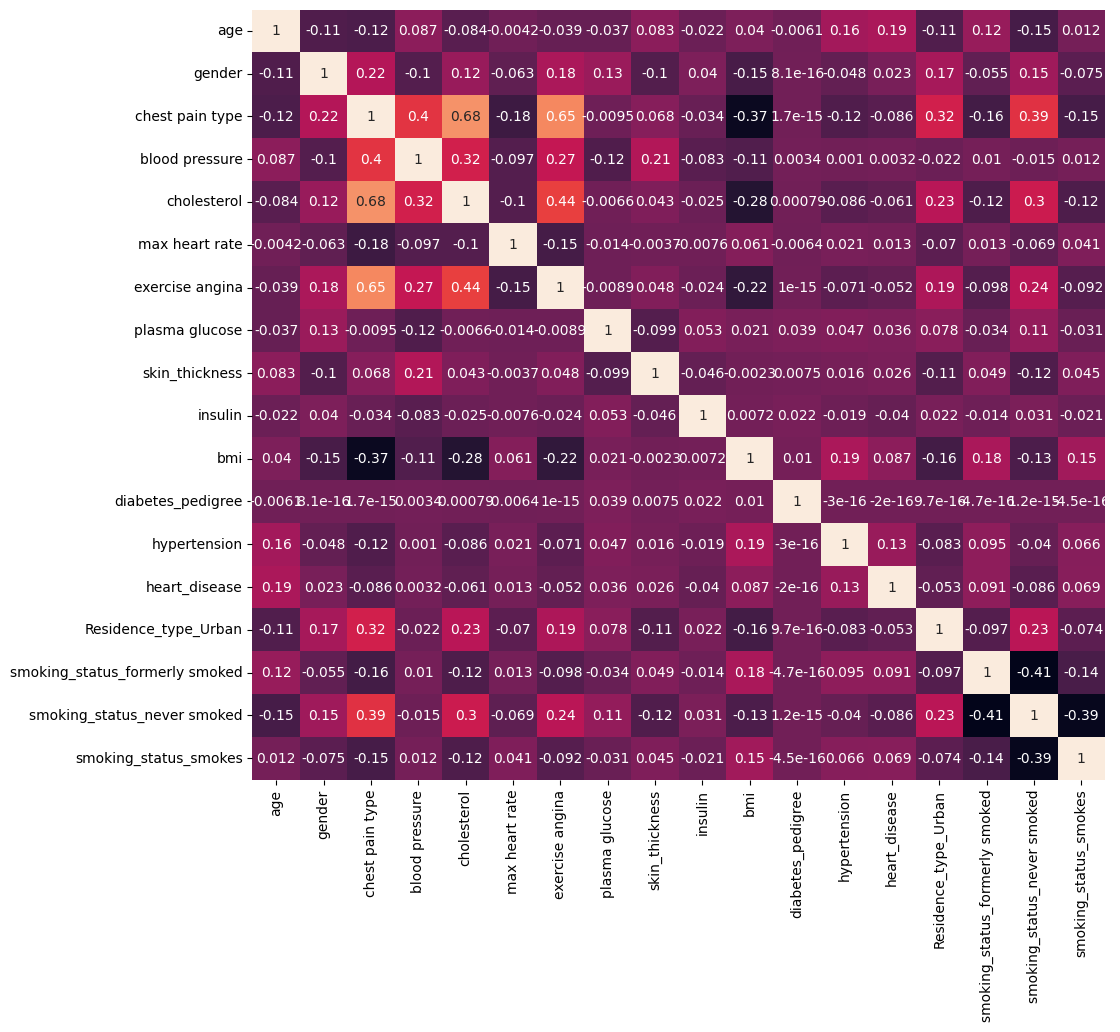

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize = (11,10))
sns.heatmap(corr_matrix,annot=True,  cbar=False)

In [ ]:
# Top Ten strongest correlations
corr_matrix=df.corr()
corr_matrix.unstack().abs().sort_values(ascending=False).drop_duplicates()[1:][:10]

chest pain type                 cholesterol                    0.684410
                                exercise angina                0.648946
exercise angina                 cholesterol                    0.437271
smoking_status_formerly smoked  smoking_status_never smoked    0.411309
chest pain type                 blood pressure                 0.403913
                                smoking_status_never smoked    0.391059
smoking_status_smokes           smoking_status_never smoked    0.385828
bmi                             chest pain type                0.368787
cholesterol                     blood pressure                 0.318358
chest pain type                 Residence_type_Urban           0.317095
dtype: float64

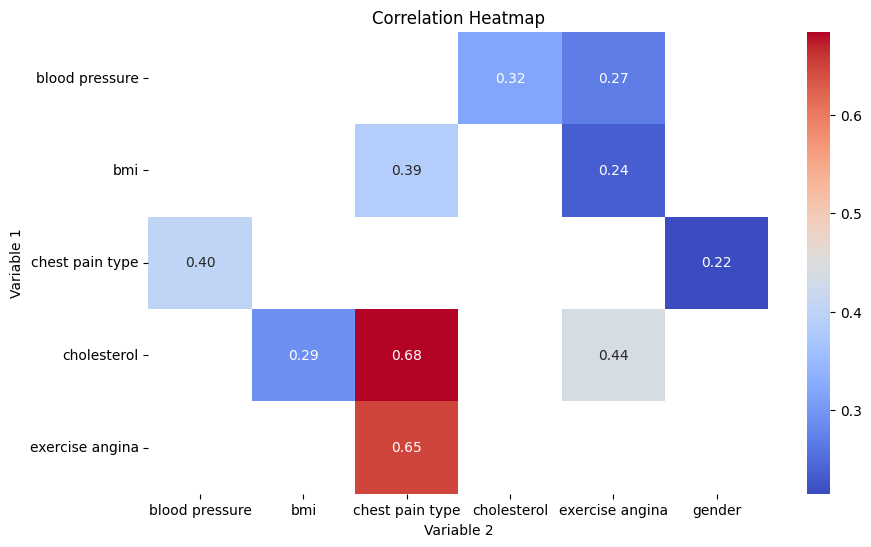

In [ ]:
correlation_data = [
    ("cholesterol", "chest pain type", 0.684418),
    ("exercise angina", "chest pain type", 0.648950),
    ("cholesterol", "exercise angina", 0.437279),
    ("chest pain type", "blood pressure", 0.403939),
    ("bmi", "chest pain type", 0.386319),
    ("blood pressure", "cholesterol", 0.318441),
    ("cholesterol", "bmi", 0.289811),
    ("blood pressure", "exercise angina", 0.269923),
    ("bmi", "exercise angina", 0.235362),
    ("chest pain type", "gender", 0.215341)
]

# Create a DataFrame from the correlation data
correlation_df = pd.DataFrame(correlation_data, columns=["Variable 1", "Variable 2", "Correlation"])

# Pivot the data to create a heatmap
heatmap_data = correlation_df.pivot(index="Variable 1", columns="Variable 2", values="Correlation")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

| Relationship                            | Insights                                                   |
|-----------------------------------------|---------------------------------------------------------------|
| Cholesterol and Chest Pain Type         | Strong positive correlation between cholesterol levels and chest pain type. Higher cholesterol levels are associated with a higher likelihood of certain types of chest pain. |
| Exercise Angina and Chest Pain Type     | Strong positive correlation between exercise-induced angina and chest pain type. Patients who experience certain types of chest pain are more likely to have exercise-induced angina. |
| Cholesterol and Exercise Angina         | Moderate positive correlation between cholesterol levels and exercise-induced angina. Higher cholesterol levels may be associated with a higher likelihood of exercise-induced angina. |
| Chest Pain Type and Blood Pressure      | Moderate positive correlation between chest pain type and blood pressure. Certain types of chest pain may be associated with higher blood pressure readings. |
| BMI and Chest Pain Type                 | Moderate positive correlation between BMI and chest pain type. Higher BMI values may be associated with certain types of chest pain. |
| Blood Pressure and Cholesterol         | Moderate positive correlation between blood pressure and cholesterol levels. Higher cholesterol levels may be associated with higher blood pressure readings. |
| Cholesterol and BMI                     | Moderate positive correlation between cholesterol levels and BMI. Higher cholesterol levels may be associated with higher BMI values. |
| Blood Pressure and Exercise Angina      | Moderate positive correlation between blood pressure and exercise-induced angina. Higher blood pressure may be associated with exercise-induced angina. |
| BMI and Exercise Angina                 | Weak positive correlation between BMI and exercise-induced angina. Higher BMI values may be slightly associated with exercise-induced angina. |
| Chest Pain Type and Gender              | Weak positive correlation between chest pain type and gender. Gender may have a slight influence on the type of chest pain experienced. |

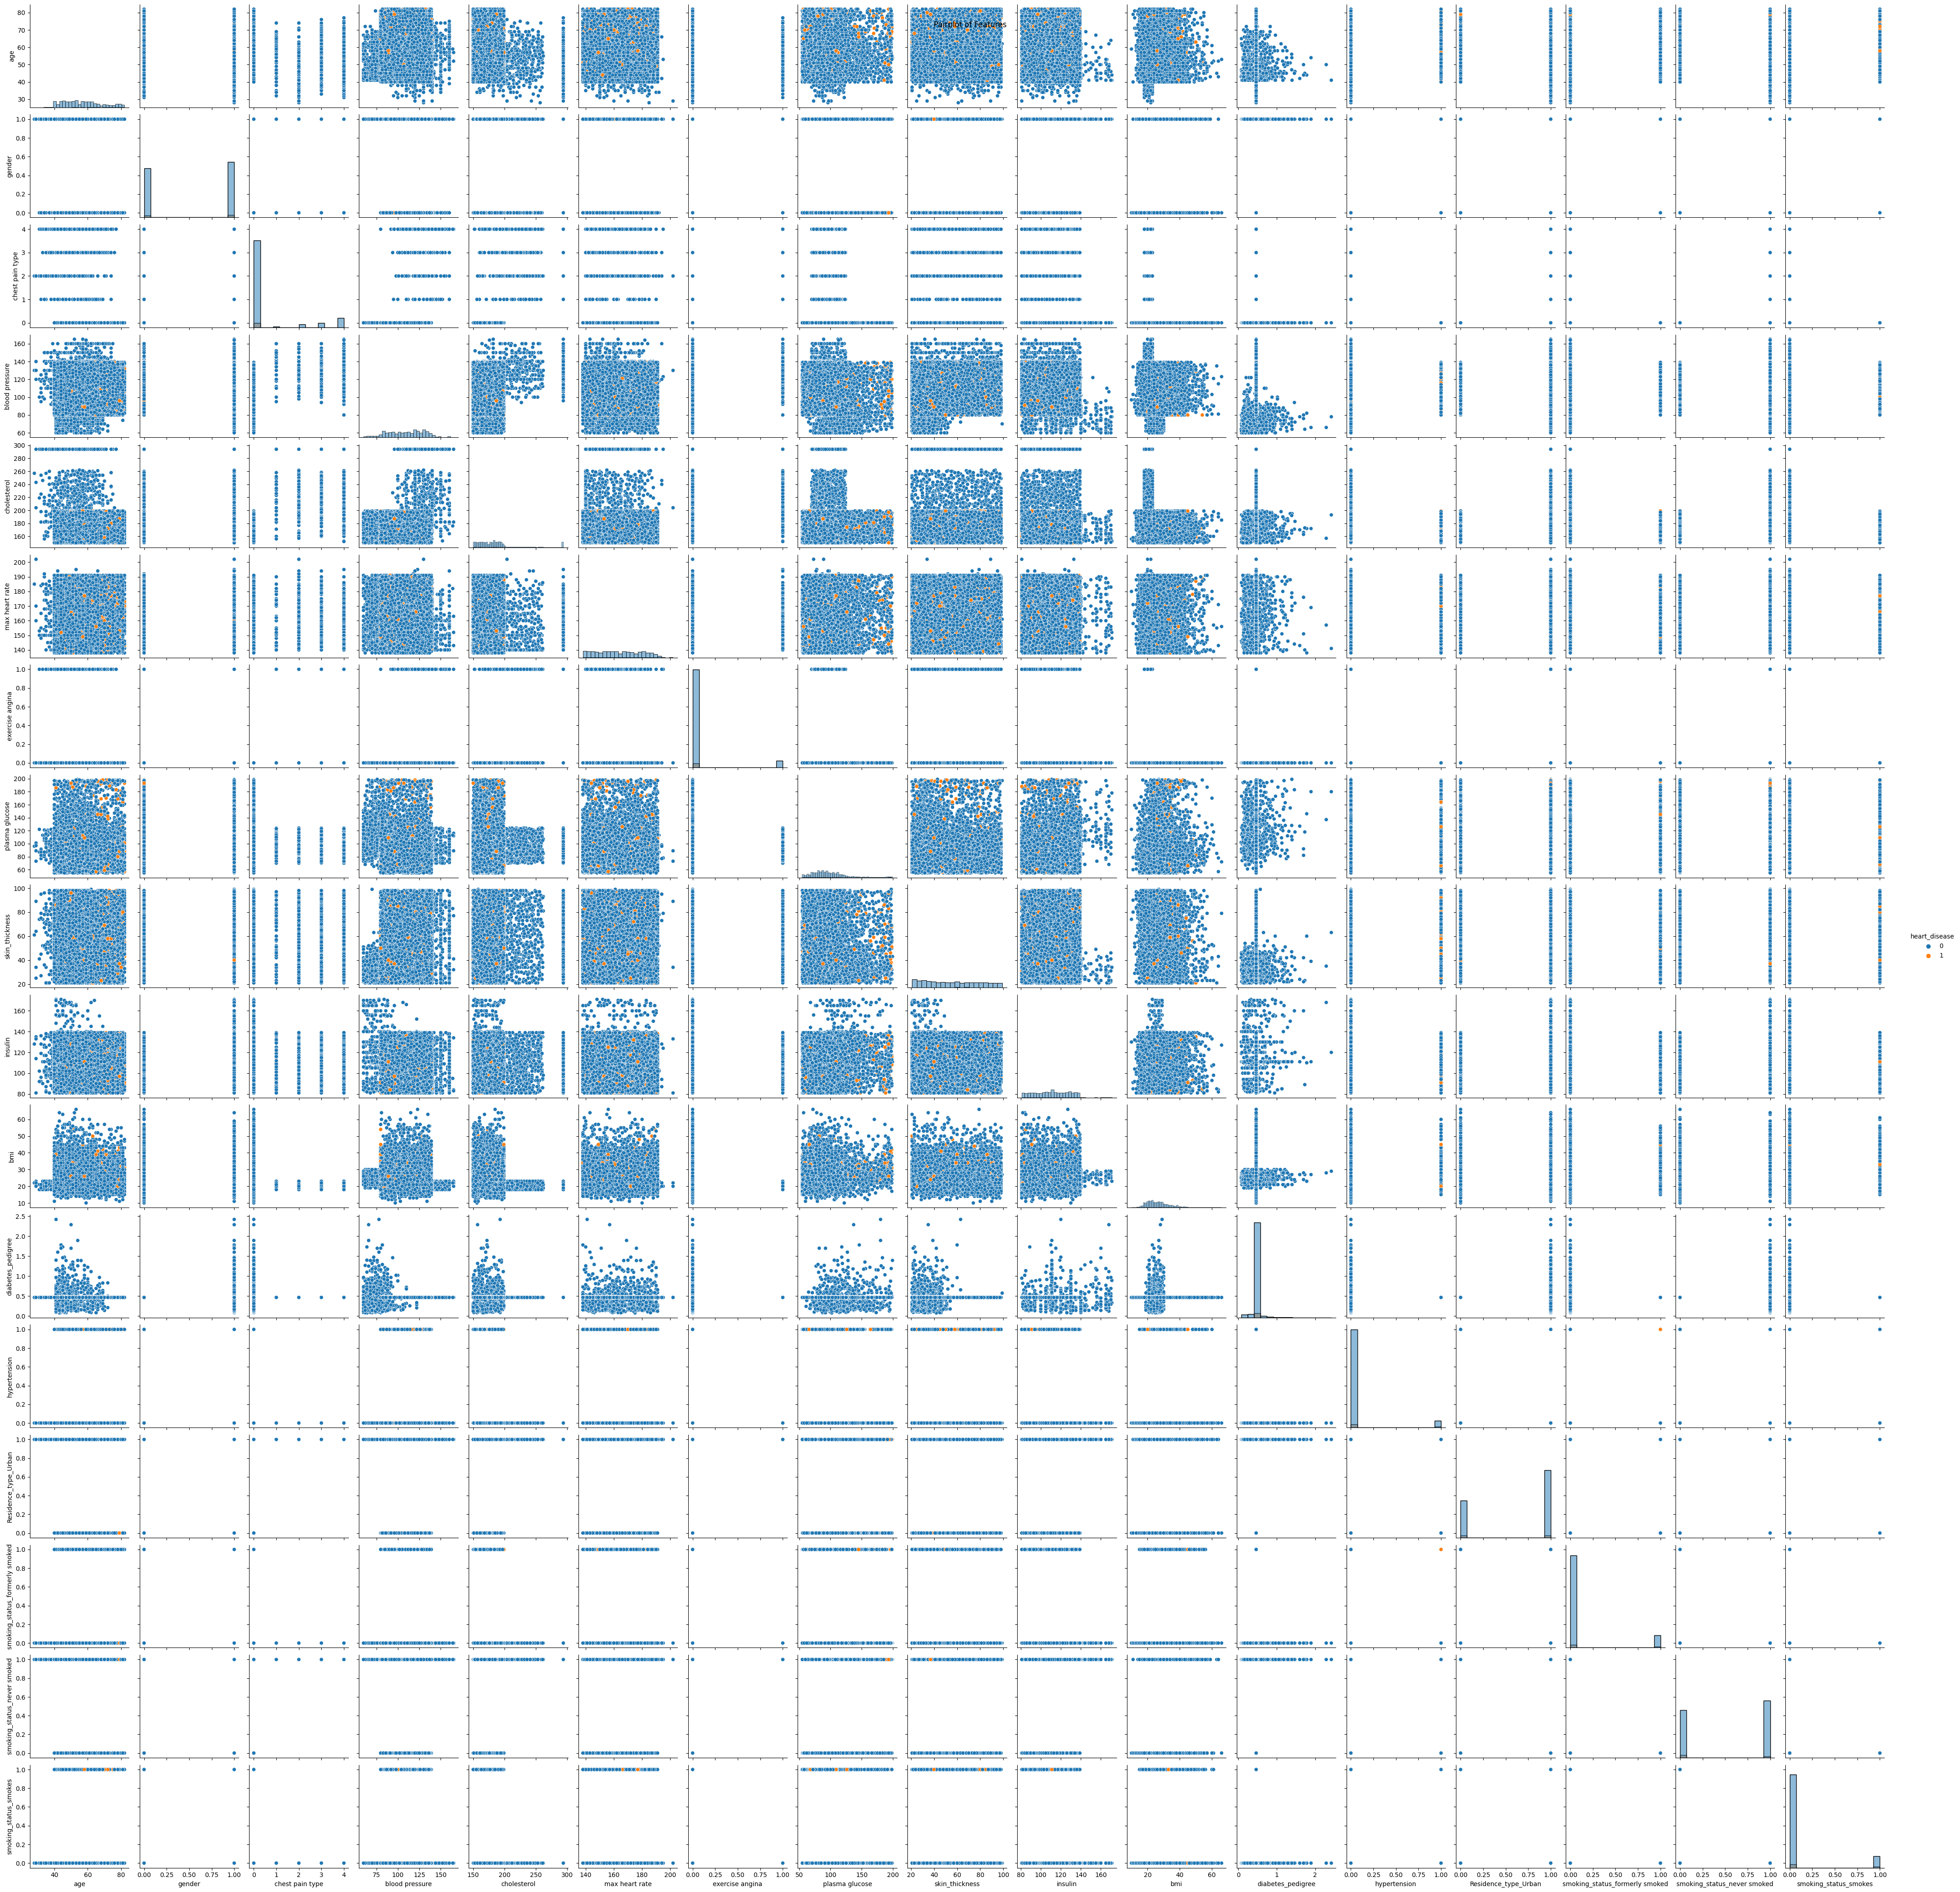

In [ ]:

#  pairplot
sns.pairplot(df, diag_kind='hist', hue='heart_disease')
plt.suptitle("Pairplot of Features")
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'chest pain type'}>,
        <Axes: title={'center': 'blood pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>,
        <Axes: title={'center': 'plasma glucose'}>],
       [<Axes: title={'center': 'skin_thickness'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'diabetes_pedigree'}>],
       [<Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

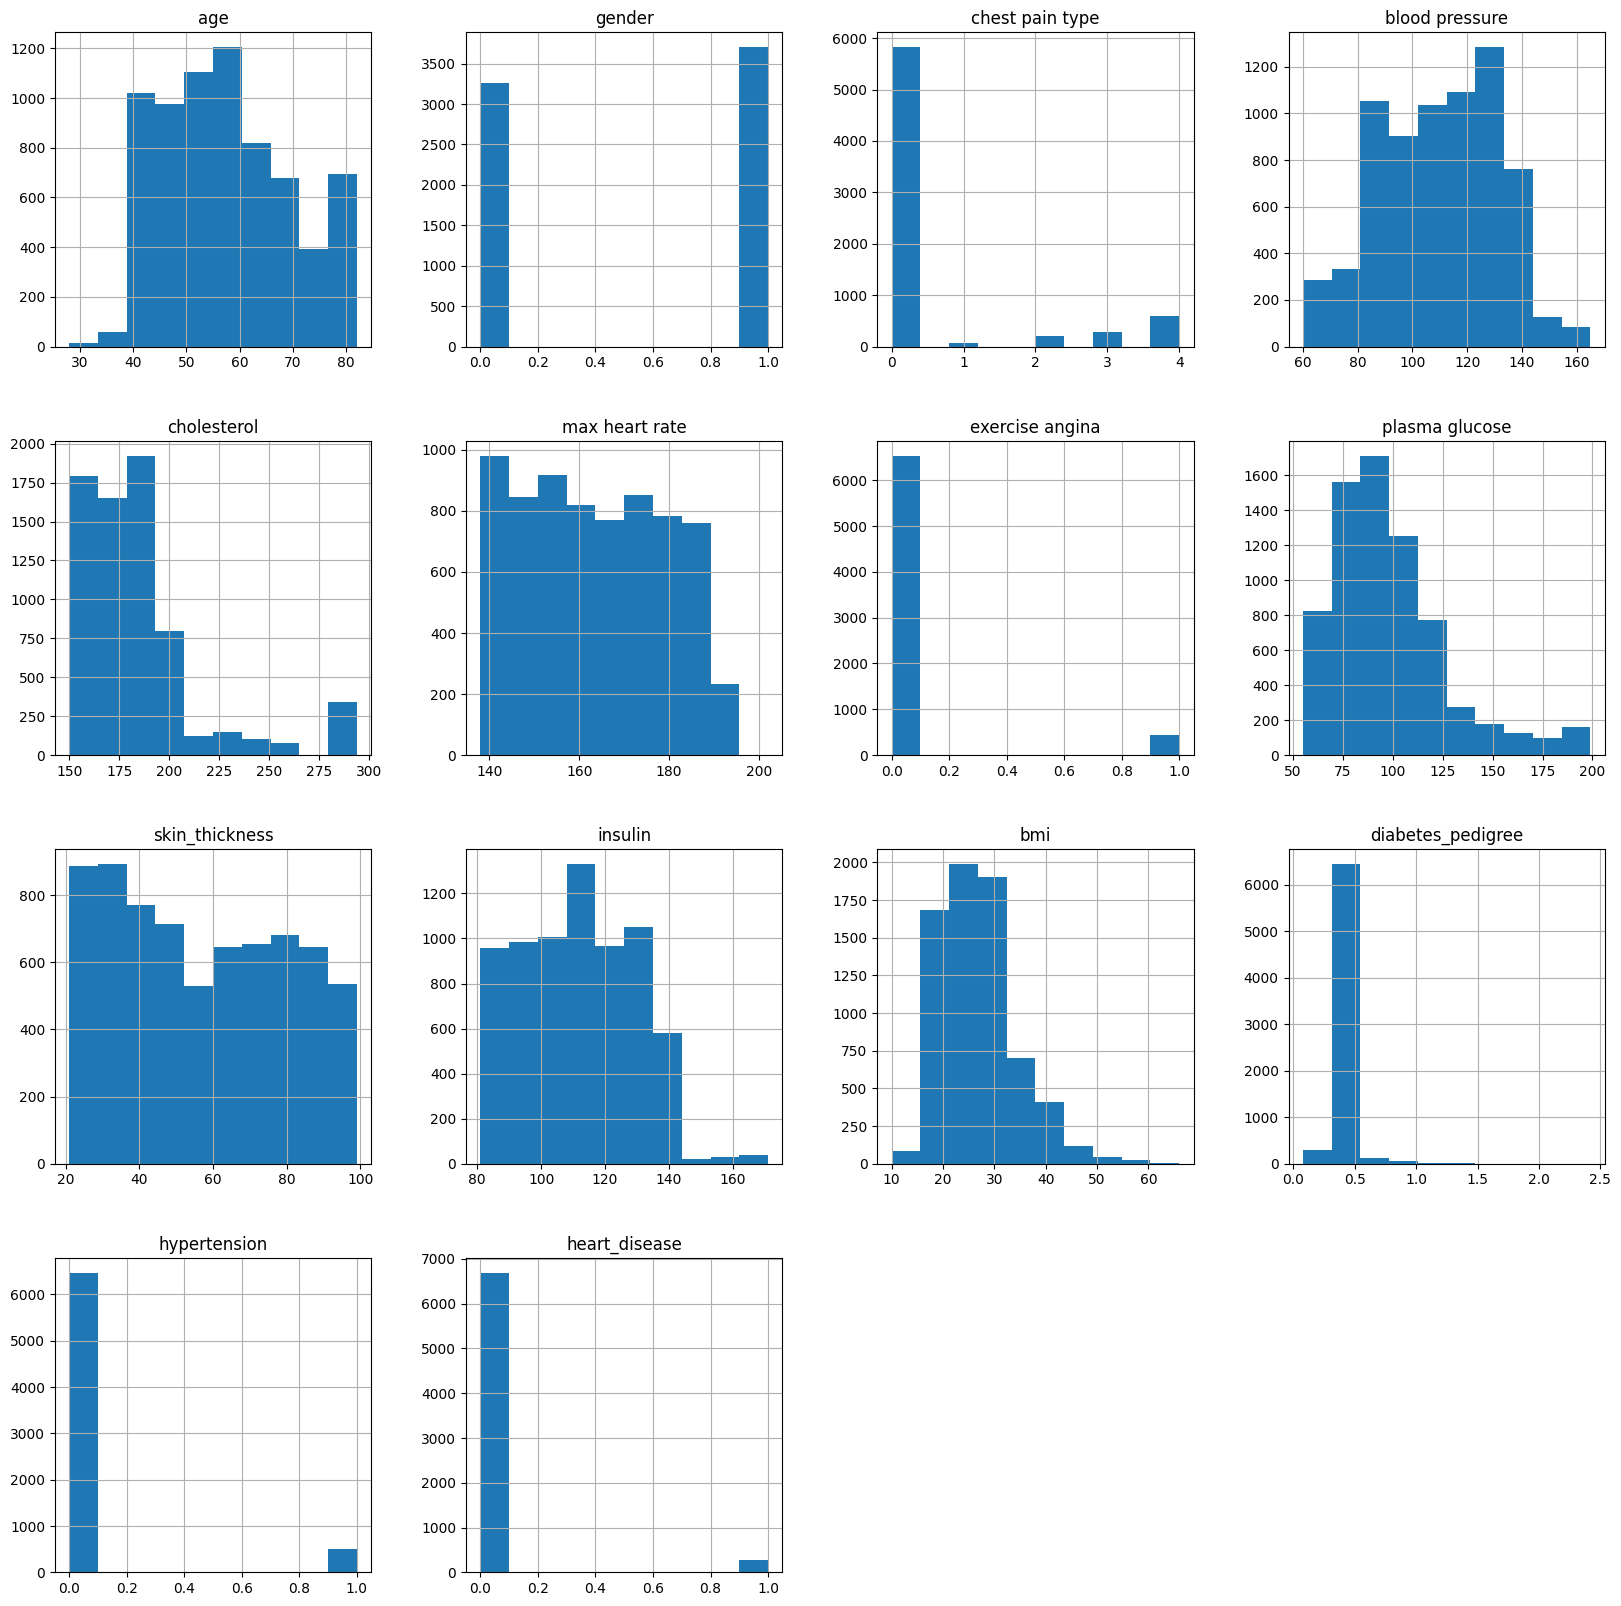

In [ ]:
df.hist(column=non_cat_columns, figsize=(20, 20))

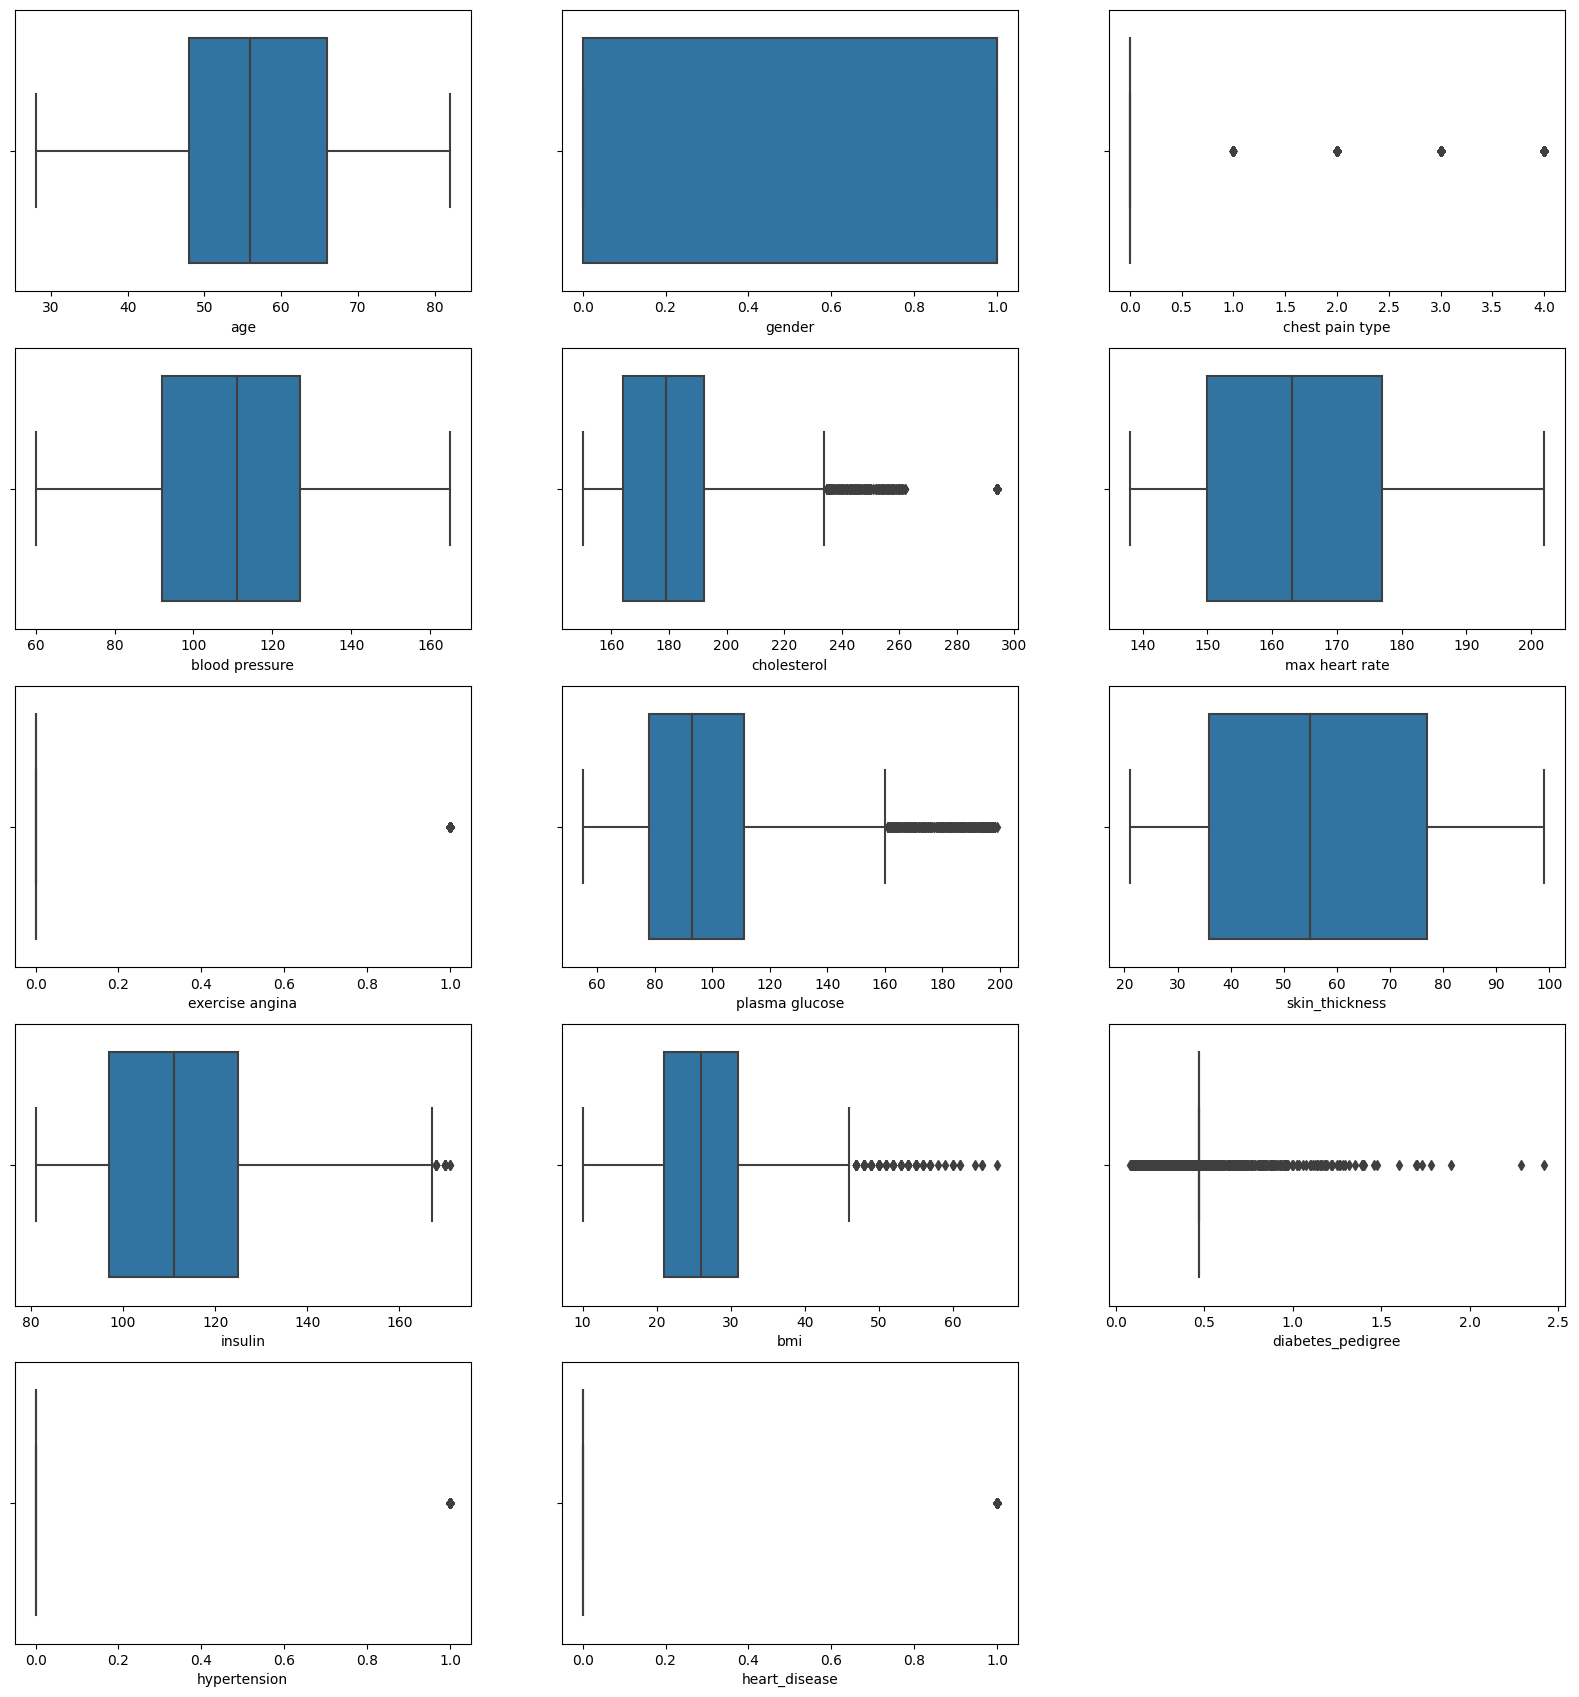

In [ ]:
fig = plt.figure(figsize = (20,30))

for i, v in enumerate(df[non_cat_columns].columns):
    axes = fig.add_subplot(7, 3, i+1)
    sns.boxplot(x = df[v], ax = axes)

**Comments:**
* Relationships:
  - Cholesterol levels exhibit a strong positive correlation with chest pain types, indicating that higher cholesterol levels are linked to specific chest pain types.
  - exercise-induced angina shows a strong positive correlation with chest pain types, implying that patients experiencing certain chest pain types are more likely to have exercise-induced angina.
  - cholesterol levels exhibit a moderate positive correlation with exercise-induced angina, suggesting that elevated cholesterol levels may contribute to exercise-induced angina risk.
  - chest pain types display a moderate positive correlation with blood pressure, signifying that particular chest pain types may coincide with higher blood pressure readings.
  - BMI exhibits a moderate positive correlation with chest pain types, implying that increased BMI values may be associated with specific chest pain types.

* Data dictribution:
  - Age Distribution: The distribution of age is nearly bell-shaped, suggesting a reasonably balanced representation of different age groups in the dataset.
  - Gender Balance: The dataset exhibits a balanced gender distribution, with approximately 50% of the individuals being women, indicating good gender representation.
  - Chest Pain Types: Nearly 90% of the individuals in the dataset report not having severe chest pain, while the majority of the remaining 10% experience severe pain, which could be indicative of a potential heart attack risk.
  - Heart Diseases and Health: The distribution of heart diseases and disorders is highly imbalanced, as expected. Most individuals in the dataset appear to be in good health, consistent with the slightly right-skewed distribution of BMI.

* Outliers:
  - While there are some outliers present in the data, they have not been removed, as they are characteristic of the dataset and may contain valuable information for analysis.

### **2. Modelling Part a)**
* Use sklearn.preprocessing.MinMaxScaler to scale the data. Print the header.


In [ ]:
df.T

0           1           2     \
age                              40.000000   49.000000   37.000000   
gender                            1.000000    0.000000    1.000000   
chest pain type                   2.000000    3.000000    2.000000   
blood pressure                  140.000000  160.000000  130.000000   
cholesterol                     294.000000  180.000000  294.000000   
max heart rate                  172.000000  156.000000  156.000000   
exercise angina                   0.000000    0.000000    0.000000   
plasma glucose                  108.000000   75.000000   98.000000   
skin_thickness                   43.000000   47.000000   53.000000   
insulin                          92.000000   90.000000  102.000000   
bmi                              19.000000   18.000000   23.000000   
diabetes_pedigree                 0.467386    0.467386    0.467386   
hypertension                      0.000000    0.000000    0.000000   
heart_disease                     0.000000    0.000000    0.000000   
Residence_type_Urban              1.000000    1.000000    1.000000   
smoking_status_formerly smoked    0.000000    0.000000    0.000000   
smoking_status_never smoked       1.000000    1.000000    1.000000   
smoking_status_smokes             0.000000    0.000000    0.000000   

                                      3           4           5     \
age                              48.000000   54.000000   39.000000   
gender                            0.000000    1.000000    1.000000   
chest pain type                   4.000000    3.000000    3.000000   
blood pressure                  138.000000  150.000000  120.000000   
cholesterol                     214.000000  195.000000  294.000000   
max heart rate                  156.000000  156.000000  170.000000   
exercise angina                   1.000000    0.000000    0.000000   
plasma glucose                   72.000000  108.000000   86.000000   
skin_thickness                   51.000000   90.000000   49.000000   
insulin                         118.000000   83.000000  106.000000   
bmi                              18.000000   21.000000   21.000000   
diabetes_pedigree                 0.467386    0.467386    0.467386   
hypertension                      0.000000    0.000000    0.000000   
heart_disease                     0.000000    0.000000    0.000000   
Residence_type_Urban              1.000000    1.000000    1.000000   
smoking_status_formerly smoked    0.000000    0.000000    0.000000   
smoking_status_never smoked       1.000000    1.000000    1.000000   
smoking_status_smokes             0.000000    0.000000    0.000000   

                                      6           7           8     \
age                              45.000000   54.000000   37.000000   
gender                            0.000000    1.000000    1.000000   
chest pain type                   2.000000    2.000000    4.000000   
blood pressure                  130.000000  110.000000  140.000000   
cholesterol                     237.000000  208.000000  207.000000   
max heart rate                  170.000000  142.000000  142.000000   
exercise angina                   0.000000    0.000000    1.000000   
plasma glucose                  116.000000  124.000000   84.000000   
skin_thickness                   39.000000   82.000000   67.000000   
insulin                          97.000000  103.000000  120.000000   
bmi                              23.000000   19.000000   22.000000   
diabetes_pedigree                 0.467386    0.467386    0.467386   
hypertension                      0.000000    0.000000    0.000000   
heart_disease                     0.000000    0.000000    0.000000   
Residence_type_Urban              1.000000    1.000000    1.000000   
smoking_status_formerly smoked    0.000000    0.000000    0.000000   
smoking_status_never smoked       1.000000    1.000000    1.000000   
smoking_status_smokes             0.000000    0.000000    0.000000   

                                      9     .

In [ ]:
# Get the column headers of the DataFrame
header = df.columns

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with scaled data and column headers
scaled_df = pd.DataFrame(scaled_data, columns=header)

# Print the header and the first few rows of the scaled DataFrame
print("Scaled Data Preview:")
scaled_df.head().T


Scaled Data Preview:


0         1         2         3  \
age                             0.222222  0.388889  0.166667  0.370370   
gender                          1.000000  0.000000  1.000000  0.000000   
chest pain type                 0.500000  0.750000  0.500000  1.000000   
blood pressure                  0.761905  0.952381  0.666667  0.742857   
cholesterol                     1.000000  0.208333  1.000000  0.444444   
max heart rate                  0.531250  0.281250  0.281250  0.281250   
exercise angina                 0.000000  0.000000  0.000000  1.000000   
plasma glucose                  0.368056  0.138889  0.298611  0.118056   
skin_thickness                  0.282051  0.333333  0.410256  0.384615   
insulin                         0.122222  0.100000  0.233333  0.411111   
bmi                             0.160714  0.142857  0.232143  0.142857   
diabetes_pedigree               0.166262  0.166262  0.166262  0.166262   
hypertension                    0.000000  0.000000  0.000000  0.000000   
heart_disease                   0.000000  0.000000  0.000000  0.000000   
Residence_type_Urban            1.000000  1.000000  1.000000  1.000000   
smoking_status_formerly smoked  0.000000  0.000000  0.000000  0.000000   
smoking_status_never smoked     1.000000  1.000000  1.000000  1.000000   
smoking_status_smokes           0.000000  0.000000  0.000000  0.000000   

                                       4  
age                             0.481481  
gender                          1.000000  
chest pain type                 0.750000  
blood pressure                  0.857143  
cholesterol                     0.312500  
max heart rate                  0.281250  
exercise angina                 0.000000  
plasma glucose                  0.368056  
skin_thickness                  0.884615  
insulin                         0.022222  
bmi                             0.196429  
diabetes_pedigree               0.166262  
hypertension                    0.000000  
heart_disease                   0.000000  
Residence_type_Urban            1.000000  
smoking_status_formerly smoked  0.000000  
smoking_status_never smoked     1.000000  
smoking_status_smokes           0.000000

### **2. Modelling Part c)**
* Use sklearn.cluster.DBSCAN to cluster the data.
* Create at least 10 different models with different choices for hyperparameters: eps, min_samples, metric, and p.
* Calculate the silhouette score for each and tabulate the results.

In [ ]:
# Create a list of hyperparameter combinations to try
eps_values = [0.2, 0.25, 0.3, 0.35, 0.4]
min_samples_values = [2, 3, 4]
metrics = ['euclidean', 'manhattan']
p_values = [1, 2]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['EPS', 'Min Samples', 'Metric', 'P', 'Silhouette Score', 'Clusters', 'Noise Points'])

# Iterate through hyperparameter combinations
model_count = 0
for eps in eps_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            for p in p_values:
                # Create DBSCAN model with current hyperparameters
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, p=p)

                # Fit the model and obtain cluster labels
                cluster_labels = dbscan.fit_predict(scaled_df)

                # Calculate silhouette score
                if len(set(cluster_labels)) > 1:
                    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
                else:
                    silhouette_avg = -1

                # Calculate the number of clusters and noise points
                n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
                n_noise_points = np.sum(cluster_labels == -1)

                # Store the results in the DataFrame
                results_df.loc[model_count] = [eps, min_samples, metric, p, silhouette_avg, n_clusters, n_noise_points]

                # Increment the model count
                model_count += 1

# Print the results DataFrame
print(results_df)


     EPS  Min Samples     Metric  P  Silhouette Score  Clusters  Noise Points
0   0.20            2  euclidean  1         -0.561576       307          6060
1   0.20            2  euclidean  2         -0.561576       307          6060
2   0.20            2  manhattan  1         -0.250827        10          6941
3   0.20            2  manhattan  2         -0.250827        10          6941
4   0.20            3  euclidean  1         -0.453632        42          6590
5   0.20            3  euclidean  2         -0.453632        42          6590
6   0.20            3  manhattan  1         -1.000000         0          6961
7   0.20            3  manhattan  2         -1.000000         0          6961
8   0.20            4  euclidean  1         -0.177531        12          6722
9   0.20            4  euclidean  2         -0.177531        12          6722
10  0.20            4  manhattan  1         -1.000000         0          6961
11  0.20            4  manhattan  2         -1.000000         0 

In [ ]:
# Sort the results DataFrame by Silhouette Score in descending order
results_df = results_df.sort_values(by='Clusters', ascending=True)
results_df

EPS  Min Samples     Metric  P  Silhouette Score  Clusters  Noise Points
11  0.20            4  manhattan  2         -1.000000         0          6961
34  0.30            4  manhattan  1         -1.000000         0          6961
35  0.30            4  manhattan  2         -1.000000         0          6961
22  0.25            4  manhattan  1         -1.000000         0          6961
10  0.20            4  manhattan  1         -1.000000         0          6961
7   0.20            3  manhattan  2         -1.000000         0          6961
23  0.25            4  manhattan  2         -1.000000         0          6961
6   0.20            3  manhattan  1         -1.000000         0          6961
18  0.25            3  manhattan  1         -0.152494         2          6955
19  0.25            3  manhattan  2         -0.152494         2          6955
46  0.35            4  manhattan  1         -0.194370         7          6923
30  0.30            3  manhattan  1         -0.196328         7          6938
47  0.35            4  manhattan  2         -0.194370         7          6923
31  0.30            3  manhattan  2         -0.196328         7          6938
3   0.20            2  manhattan  2         -0.250827        10          6941
2   0.20            2  manhattan  1         -0.250827        10          6941
59  0.40            4  manhattan  2         -0.190594        12          6858
8   0.20            4  euclidean  1         -0.177531        12          6722
9   0.20            4  euclidean  2         -0.177531        12          6722
58  0.40            4  manhattan  1         -0.190594        12          6858
43  0.35            3  manhattan  2         -0.310673        22          6870
42  0.35            3  manhattan  1         -0.310673        22          6870
14  0.25            2  manhattan  1         -0.363245        32          6895
15  0.25            2  manhattan  2         -0.363245        32          6895
54  0.40            3  manhattan  1         -0.350072        37          6742
55  0.40            3  manhattan  2         -0.350072        37          6742
4   0.20            3  euclidean  1         -0.453632        42          6590
56  0.40            4  euclidean  1          0.168007        42          1091
57  0.40            4  euclidean  2          0.168007        42          1091
5   0.20            3  euclidean  2         -0.453632        42          6590
45  0.35            4  euclidean  2         -0.063333        61          2072
44  0.35            4  euclidean  1         -0.063333        61          2072
27  0.30            2  manhattan  2         -0.499874        64          6824
26  0.30            2  manhattan  1         -0.499874        64          6824
52  0.40            3  euclidean  1          0.124099        66           894
53  0.40            3  euclidean  2          0.124099        66           894
20  0.25            4  euclidean  1         -0.455875        70          5990
21  0.25            4  euclidean  2         -0.455875        70          5990
40  0.35            3  euclidean  1         -0.055572       100          1695
41  0.35            3  euclidean  2         -0.055572       100          1695
38  0.35            2  manhattan  1         -0.548753       128          6658
39  0.35            2  manhattan  2         -0.548753       128          6658
32  0.30            4  euclidean  1         -0.355617       158          4032
33  0.30            4  euclidean  2         -0.355617       158          4032
49  0.40            2  euclidean  2         -0.049943       168           690
48  0.40            2  euclidean  1         -0.049943       168           690
16  0.25            3  euclidean  1         -0.479186       203          5404
17  0.25            3  euclidean  2         -0.479186       203          5404
51  0.40            2  manhattan  2         -0.573466       216          6384
50  0.40            2  manhattan  1         -0.573466       216          6384
29  0.30            3  eucl

In [ ]:
# Sort the results DataFrame by Silhouette Score in descending order
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)

# Get the best hyperparameters and Silhouette Score
best_hyperparameters = results_df.iloc[0]
best_eps = best_hyperparameters['EPS']
best_min_samples = best_hyperparameters['Min Samples']
best_metric = best_hyperparameters['Metric']
best_p = best_hyperparameters['P']
best_silhouette_score = best_hyperparameters['Silhouette Score']

# Sort the results DataFrame by Silhouette Score in descending order
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)

# Get the best hyperparameters and Silhouette Score
best_hyperparameters = results_df.iloc[0]

# Print the best model row as a DataFrame
best_model_df = pd.DataFrame(best_hyperparameters).transpose()
print("Best Model:")
best_model_df




Best Model:


EPS Min Samples     Metric  P Silhouette Score Clusters Noise Points
57  0.4           4  euclidean  2         0.168007       42         1091

**Comments:**

The initial evaluation of DBSCAN models using the Silhouette Score revealed that none of the models performed satisfactorily. Even the best model resulted in an impractical scenario with 42 clusters, which is inconsistent with the intended use of DBSCAN in emergency triage.

To address this issue, a more thoughtful approach was adopted. The selection of important features for modeling was prioritized, considering the following factors:

By focusing on these top ten important features, the new approach aims to create a more practical and efficient model for emergency triage. Additionally, the inclusion of noise points in the dataset reflects the real-world complexity of emergency scenarios and provides a more accurate representation of the challenges faced in triage decision-making.

This revised strategy considers both the importance of features and the practicality of the model, aiming to better serve the triage process in emergency situations.

*Chosen features for the new best model:*

| Rank | Variable                     | Comments                                           |
|------|------------------------------|---------------------------------------------------|
| 1    | Chest Pain Type              | Strong indicator of potential cardiac issues.     |
| 2    | Max Heart Rate               | Higher heart rate could indicate stress or risk.  |
| 3    | Heart Disease                | Critical if present, requiring immediate care.    |
| 4    | Exercise Angina              | Indicates heart stress during physical activity.  |
| 5    | Blood Pressure               | Vital sign, important for assessing circulatory health. |
| 6    | Cholesterol                  | May contribute to heart-related conditions.       |
| 7    | Plasma Glucose               | Elevated levels may suggest diabetic complications. |
| 8    | Insulin                      | Relevant for diabetes management and monitoring.  |
| 9    | Age                          | Age can influence triage decisions and treatment plans. |


In [ ]:
print(scaled_df.columns)

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [ ]:
scaled_df_new = scaled_df[['age', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'insulin', 'heart_disease']]
scaled_df_new.head().T

0         1         2         3         4
age              0.222222  0.388889  0.166667  0.370370  0.481481
chest pain type  0.500000  0.750000  0.500000  1.000000  0.750000
blood pressure   0.761905  0.952381  0.666667  0.742857  0.857143
cholesterol      1.000000  0.208333  1.000000  0.444444  0.312500
max heart rate   0.531250  0.281250  0.281250  0.281250  0.281250
exercise angina  0.000000  0.000000  0.000000  1.000000  0.000000
plasma glucose   0.368056  0.138889  0.298611  0.118056  0.368056
insulin          0.122222  0.100000  0.233333  0.411111  0.022222
heart_disease    0.000000  0.000000  0.000000  0.000000  0.000000

In [ ]:
# Create a list of hyperparameter combinations to try
eps_values = [0.2, 0.25, 0.3, 0.35, 0.4]
min_samples_values = [2, 3, 4]
metrics = ['euclidean', 'manhattan']
p_values = [1, 2]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['EPS', 'Min Samples', 'Metric', 'P', 'Silhouette Score', 'Clusters', 'Noise Points'])

# Iterate through hyperparameter combinations
model_count = 0
for eps in eps_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            for p in p_values:
                # Create DBSCAN model with current hyperparameters
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, p=p)

                # Fit the model and obtain cluster labels
                cluster_labels = dbscan.fit_predict(scaled_df_new)

                # Calculate silhouette score
                if len(set(cluster_labels)) > 1:
                    silhouette_avg = silhouette_score(scaled_df_new, cluster_labels)
                else:
                    silhouette_avg = -1

                # Calculate the number of clusters and noise points
                n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
                n_noise_points = np.sum(cluster_labels == -1)

                # Store the results in the DataFrame
                results_df.loc[model_count] = [eps, min_samples, metric, p, silhouette_avg, n_clusters, n_noise_points]

                # Increment the model count
                model_count += 1

# Print the results DataFrame
print(results_df)


     EPS  Min Samples     Metric  P  Silhouette Score  Clusters  Noise Points
0   0.20            2  euclidean  1         -0.182320       202           655
1   0.20            2  euclidean  2         -0.182320       202           655
2   0.20            2  manhattan  1         -0.416508       788          4803
3   0.20            2  manhattan  2         -0.416508       788          4803
4   0.20            3  euclidean  1         -0.163059        89           881
5   0.20            3  euclidean  2         -0.163059        89           881
6   0.20            3  manhattan  1         -0.529908       250          5879
7   0.20            3  manhattan  2         -0.529908       250          5879
8   0.20            4  euclidean  1         -0.121055        62          1085
9   0.20            4  euclidean  2         -0.121055        62          1085
10  0.20            4  manhattan  1         -0.488960        84          6536
11  0.20            4  manhattan  2         -0.488960        84 

In [ ]:
# Sort the results DataFrame by Silhouette Score in descending order
results_df = results_df.sort_values(by='Noise Points', ascending=True)
results_df

EPS  Min Samples     Metric  P  Silhouette Score  Clusters  Noise Points
49  0.40            2  euclidean  2          0.359674         4             1
48  0.40            2  euclidean  1          0.359674         4             1
57  0.40            4  euclidean  2          0.380066         3             3
56  0.40            4  euclidean  1          0.380066         3             3
53  0.40            3  euclidean  2          0.380066         3             3
52  0.40            3  euclidean  1          0.380066         3             3
36  0.35            2  euclidean  1          0.343787         8            12
37  0.35            2  euclidean  2          0.343787         8            12
41  0.35            3  euclidean  2          0.361783         5            18
40  0.35            3  euclidean  1          0.361783         5            18
45  0.35            4  euclidean  2          0.372274         4            25
44  0.35            4  euclidean  1          0.372274         4            25
25  0.30            2  euclidean  2          0.004025        24            78
24  0.30            2  euclidean  1          0.004025        24            78
28  0.30            3  euclidean  1          0.069700         9           108
29  0.30            3  euclidean  2          0.069700         9           108
32  0.30            4  euclidean  1          0.084384         8           132
33  0.30            4  euclidean  2          0.084384         8           132
13  0.25            2  euclidean  2         -0.181942        66           246
12  0.25            2  euclidean  1         -0.181942        66           246
16  0.25            3  euclidean  1         -0.059138        34           310
17  0.25            3  euclidean  2         -0.059138        34           310
20  0.25            4  euclidean  1          0.074410        26           417
21  0.25            4  euclidean  2          0.074410        26           417
50  0.40            2  manhattan  1         -0.207534       168           498
51  0.40            2  manhattan  2         -0.207534       168           498
0   0.20            2  euclidean  1         -0.182320       202           655
1   0.20            2  euclidean  2         -0.182320       202           655
55  0.40            3  manhattan  2         -0.121421        74           686
54  0.40            3  manhattan  1         -0.121421        74           686
39  0.35            2  manhattan  2         -0.241383       254           872
38  0.35            2  manhattan  1         -0.241383       254           872
4   0.20            3  euclidean  1         -0.163059        89           881
5   0.20            3  euclidean  2         -0.163059        89           881
59  0.40            4  manhattan  2         -0.118440        53           918
58  0.40            4  manhattan  1         -0.118440        53           918
9   0.20            4  euclidean  2         -0.121055        62          1085
8   0.20            4  euclidean  1         -0.121055        62          1085
43  0.35            3  manhattan  2         -0.199141       102          1176
42  0.35            3  manhattan  1         -0.199141       102          1176
27  0.30            2  manhattan  2         -0.432210       308          1435
26  0.30            2  manhattan  1         -0.432210       308          1435
46  0.35            4  manhattan  1         -0.268818        55          1457
47  0.35            4  manhattan  2         -0.268818        55          1457
30  0.30            3  manhattan  1         -0.396631        99          1853
31  0.30            3  manhattan  2         -0.396631        99          1853
35  0.30            4  manhattan  2         -0.387362        52          2223
34  0.30            4  manhattan  1         -0.387362        52          2223
15  0.25            2  manhattan  2         -0.433141       601          2684
14  0.25            2  manhattan  1         -0.433141       601          2684
19  0.25            3  manh

In [ ]:
# Sort the results DataFrame by Silhouette Score in descending order
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)

# Get the best hyperparameters and Silhouette Score
best_hyperparameters = results_df.iloc[0]
best_eps = best_hyperparameters['EPS']
best_min_samples = best_hyperparameters['Min Samples']
best_metric = best_hyperparameters['Metric']
best_p = best_hyperparameters['P']
best_silhouette_score = best_hyperparameters['Silhouette Score']

# Sort the results DataFrame by Silhouette Score in descending order
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)

# Get the best hyperparameters and Silhouette Score
best_hyperparameters = results_df.iloc[0]

# Print the best model row as a DataFrame
best_model_df = pd.DataFrame(best_hyperparameters).transpose()
print("Best Model:")
best_model_df

Best Model:


EPS Min Samples     Metric  P Silhouette Score Clusters Noise Points
57  0.4           4  euclidean  2         0.380066        3            3

In [ ]:

#save best model
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, metric=best_metric, p=best_p)
best_dbscan_labels = best_dbscan.fit_predict(scaled_df_new)

print(len(best_dbscan_labels))

6961


In [ ]:
# Identify Core Points
sample_cores = np.zeros_like(best_dbscan_labels, dtype=bool)
sample_cores[best_dbscan.core_sample_indices_] = True

# Calculate the Number of Clusters
n_clusters = len(set(best_dbscan_labels)) - (1 if -1 in best_dbscan_labels else 0)

# Print the Results
print("Core Points:")
print(f"There are {np.sum(sample_cores)} core points identified in the dataset.")

print("\nNumber of Clusters:")
print(f"The DBSCAN algorithm detected {n_clusters} clusters in the data.")


Core Points:
There are 6942 core points identified in the dataset.

Number of Clusters:
The DBSCAN algorithm detected 3 clusters in the data.


In [ ]:
#identify the clusters
clusters = best_dbscan_labels

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 3
Number of noise points: 3
Number of points per cluster:
Cluster 0 : 6256
Cluster 1 : 427
Cluster 2 : 275


**Comments: Best DBSCAN Model based on Silohuette Score:**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups data points based on their proximity and density. The Silhouette Score is a metric used to evaluate the quality of clusters created by DBSCAN. It measures how well-separated and distinct the clusters are, with values ranging from -1 (poor clustering) to 1 (perfect clustering).

In this analysis, we explored various combinations of hyperparameters for DBSCAN, including:

In addition to considering the Silhouette Score, we carefully assessed the number of clusters and noisy points as integral parts of the model evaluation. Initially, the DBSCAN model yielded suboptimal results, characterized by excessive noise and impractical clustering outcomes. To address this, a refined approach was adopted, which significantly improved the results.

Throughout this analysis, I explored diverse hyperparameter combinations for DBSCAN, encompassing:

*EPS:* The maximum distance for a data point to be considered within the neighborhood of another.
*Min Samples:* The minimum number of samples in a neighborhood required for a data point to be designated as a core point.
*Metric:* The chosen distance metric for proximity measurement, such as Euclidean or Manhattan.
*P:* The power parameter governing the Minkowski distance metric.
The Silhouette Score was computed for each hyperparameter combination, and the model with the highest Silhouette Score was designated as the optimal DBSCAN model.

Best Model:

EPS: {best_eps} = 0.4
Min Samples: {best_min_samples} = 4
Metric: {best_metric} = Euclidean
P: {best_p} = 2

The top-performing DBSCAN model attained an decent Silhouette Score, indicating its prowess in crafting well-defined and distinct data clusters. This underscores that data points within each cluster exhibit similarities while maintaining separation from points in other clusters. The chosen hyperparameters have been fine-tuned to bolster the model's capability to capture meaningful patterns and effectively group data points.







### **3. Conclusions, Part a)**
* Based on your analysis in step 1, choose a pair of columns and generate a scatter plot of the data.
* Use the model predictions to colour the points according to the cluster they belong to.
* Use markdown to comment on the plot.


In [ ]:
scaled_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6961 entries, 0 to 6960
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              6961 non-null   float64
 1   chest pain type  6961 non-null   float64
 2   blood pressure   6961 non-null   float64
 3   cholesterol      6961 non-null   float64
 4   max heart rate   6961 non-null   float64
 5   exercise angina  6961 non-null   float64
 6   plasma glucose   6961 non-null   float64
 7   insulin          6961 non-null   float64
 8   heart_disease    6961 non-null   float64
dtypes: float64(9)
memory usage: 489.6 KB


In [ ]:
print(scaled_df_new.columns)

Index(['age', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'insulin',
       'heart_disease'],
      dtype='object')


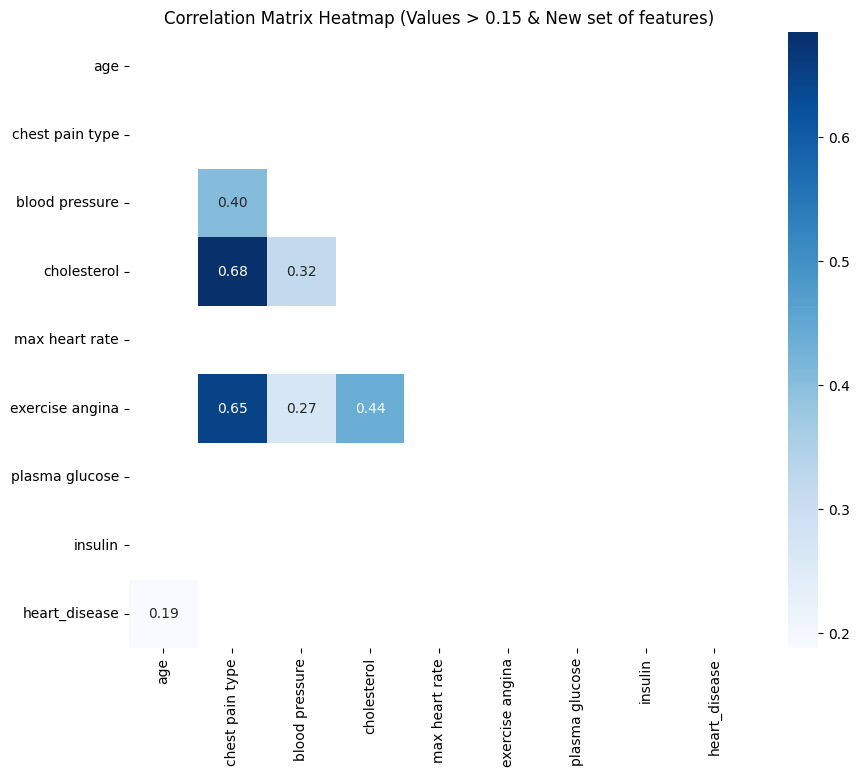

In [ ]:
# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix_selected, dtype=bool))

# Heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='Blues', fmt=".2f", mask=mask)
plt.title("Correlation Matrix Heatmap (Values > 0.15 & New set of features)")
plt.show()


In [ ]:
print(df.columns)

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


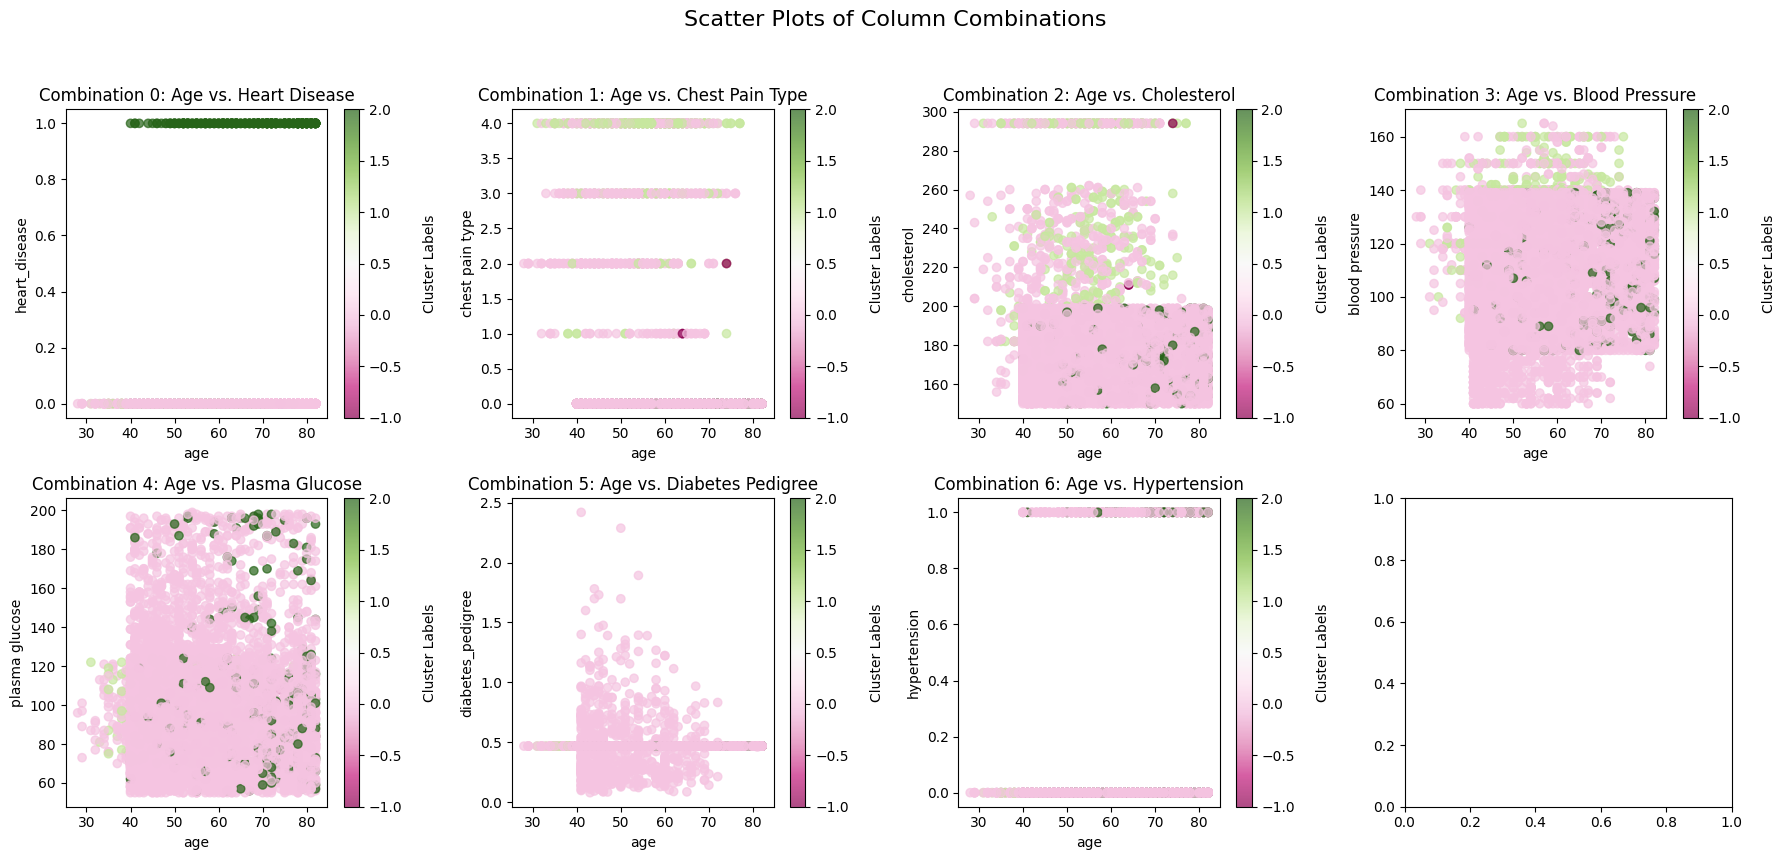

In [ ]:
# Define combinations of columns and corresponding titles
column_combinations =  [
    ('age', 'heart_disease', 'Combination 0: Age vs. Heart Disease'),
    ('age', 'chest pain type', 'Combination 1: Age vs. Chest Pain Type'),
    ('age', 'cholesterol', 'Combination 2: Age vs. Cholesterol'),
    ('age', 'blood pressure', 'Combination 3: Age vs. Blood Pressure'),
    ('age', 'plasma glucose', 'Combination 4: Age vs. Plasma Glucose'),
    ('age', 'diabetes_pedigree', 'Combination 5: Age vs. Diabetes Pedigree'),
    ('age', 'hypertension', 'Combination 6: Age vs. Hypertension')
]

c = best_dbscan_labels
cmap = 'PiYG'

# Create subplots for each combination
fig, axs = plt.subplots(2, 4, figsize=(18, 9))
fig.suptitle("Scatter Plots of Column Combinations", fontsize=16)

for i, (x_col, y_col, title) in enumerate(column_combinations):
    row = i // 4
    col = i % 4
    ax = axs[row, col]

    # Scatter plot for each combination
    scatter = ax.scatter(df[x_col], df[y_col], c=c, cmap=cmap, alpha=0.7)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(title)

    # Add color bar for reference
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label("Cluster Labels", rotation=90, labelpad=15)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



**Comments and Key Observations from Data Analysis:**

Age and Heart Disease: The analysis reveals a strong association between age and the prevalence of heart disease. The likelihood of heart disease significantly increases with age, particularly in individuals over 40 years old. This underscores the importance of cardiovascular health monitoring as individuals grow older.

Chest Pain and Age: Patients aged 30 and above tend to experience different types of chest pain. This suggests that chest pain can be a common symptom across various age groups, emphasizing the need for accurate diagnosis and triage.

Cholesterol Levels: Another noteworthy finding is that individuals over 40 often exhibit higher levels of cholesterol. Elevated cholesterol levels are known to contribute to heart-related conditions, making it crucial to monitor and manage cholesterol levels, especially in older age groups.

Blood Pressure and Glucose: While high blood pressure is commonly associated with older individuals, this analysis reveals that individuals aged 40 and above are more likely to experience issues with both blood pressure and glucose levels.

Hypertension Across Ages: Contrary to the assumption that hypertension primarily affects older individuals, the data suggests that hypertensive patients are not limited to older age groups. Younger individuals can also be affected by hypertension.











### **3. Conclusions, Part b)**
* Generate a histogram that shows the number of elements in each cluster.
* Use markdown to comment on the histogram.

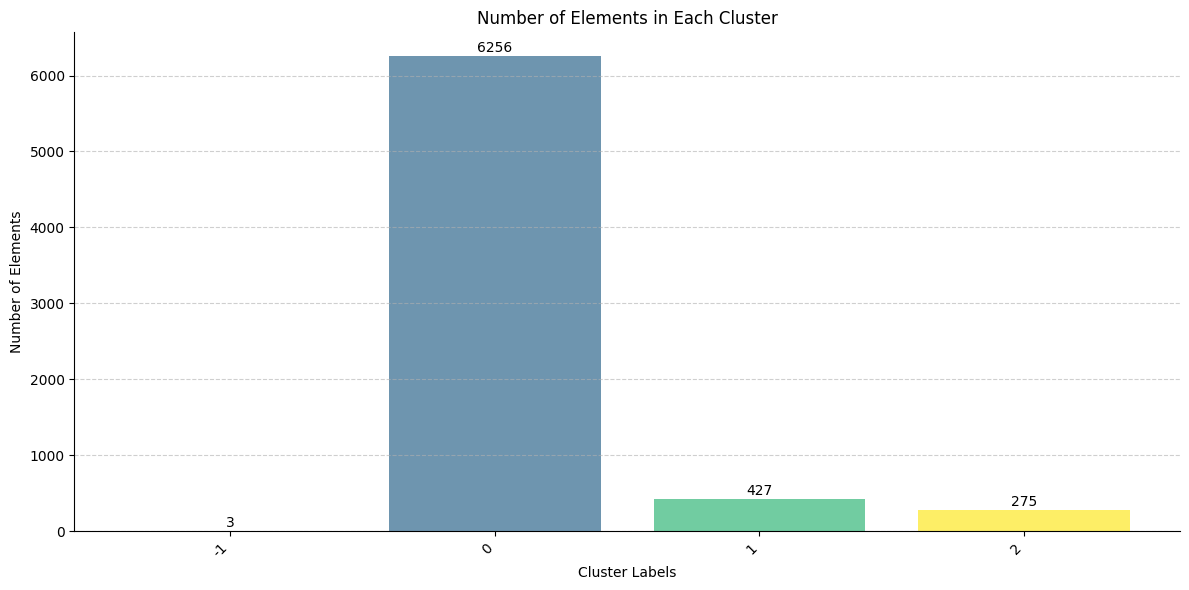

In [ ]:
# Count unique labels and their occurrences
unique_labels, label_counts = np.unique(best_dbscan_labels, return_counts=True)

# Create a colorful palette for bars
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Create a figure and axis with customized size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot with custom color, transparency, and labels
bars = ax.bar(unique_labels, label_counts, align='center', alpha=0.7, color=colors)

# Set plot labels and title
ax.set_xlabel('Cluster Labels')
ax.set_ylabel('Number of Elements')
ax.set_title('Number of Elements in Each Cluster')

# Customize the tick positions and labels
ax.set_xticks(unique_labels)
ax.set_xticklabels(unique_labels, rotation=45, ha='right')

# Annotate each bar with its count total
for bar, count in zip(bars, label_counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(count), ha='center', va='bottom')

# Add gridlines to the plot
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Remove the top and right spines for better appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize the appearance of y-axis ticks
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Show the plot
plt.tight_layout()
plt.show()


**Comments:**

Analyzing the clustering results, we observe that the distribution of patients across clusters aligns well with the triage rules and expected waiting times in an emergency hospital setting.

* Cluster 0 (Yellow Category - 625 Patients): The largest cluster, containing 625 patients, corresponds to cases that are categorized as non-critical or 'yellow' based on the triage system. According to hospital protocols, patients in this category can typically wait for up to 4 hours before receiving medical attention. This cluster represents a majority of cases that may require medical care but are not in immediate danger.

* Cluster 1 (Orange Category - 427 Patients): The second-largest cluster includes 427 patients and falls into the 'medium emergent' category. In line with triage guidelines, patients in this category are expected to be attended to within 1 hour. The presence of this cluster reflects patients who need relatively prompt care, but their conditions are not as severe as those in the 'immediate' category.

* Cluster 2 (Red Category - 275 Patients): The smallest cluster consists of 275 patients and corresponds to those categorized as 'immediate' cases. As per emergency room protocols, these patients should receive immediate medical attention. This cluster is the most critical, encompassing individuals with severe conditions or injuries requiring urgent intervention.










### **3. Conclusions, Part c)**
* Create a separate dataframe for each cluster and use pandas.
* DataFrame.describe to describe each. Provide a written conclusion to describe each group of patients and rank the level of urgency.

In [ ]:
# Create an empty dictionary to store dataframes for each cluster
cluster_dataframes = {}

# Iterate through unique cluster labels
unique_labels = set(best_dbscan_labels)
for label in unique_labels:
    # Filter the original dataframe based on the cluster label
    cluster_df = df[best_dbscan_labels == label]

    # Store the filtered dataframe in the dictionary with the cluster label as the key
    cluster_dataframes[label] = cluster_df

# Now, cluster_dataframes contains separate dataframes for each cluster

yellow = cluster_dataframes[0]
orange = cluster_dataframes[1]
red = cluster_dataframes[2]
print("Patients categorized as yellow:")
yellow.describe().T


Patients categorized as yellow:


count        mean        std      min  \
age                             6256.0   57.087756  11.915106   28.000   
gender                          6256.0    0.504795   0.500017    0.000   
chest pain type                 6256.0    0.334399   0.988700    0.000   
blood pressure                  6256.0  108.061541  21.185109   60.000   
cholesterol                     6256.0  181.387948  27.800354  150.000   
max heart rate                  6256.0  164.088555  15.459459  138.000   
exercise angina                 6256.0    0.000000   0.000000    0.000   
plasma glucose                  6256.0   97.877558  28.858846   55.000   
skin_thickness                  6256.0   56.381234  22.891066   21.000   
insulin                         6256.0  111.355818  17.496036   81.000   
bmi                             6256.0   27.120844   7.362191   10.000   
diabetes_pedigree               6256.0    0.467386   0.108302    0.078   
hypertension                    6256.0    0.069373   0.254108    0.000   
heart_disease                   6256.0    0.000000   0.000000    0.000   
Residence_type_Urban            6256.0    0.619885   0.485454    0.000   
smoking_status_formerly smoked  6256.0    0.128996   0.335222    0.000   
smoking_status_never smoked     6256.0    0.515505   0.499799    0.000   
smoking_status_smokes           6256.0    0.116368   0.320692    0.000   

                                       25%         50%         75%     max  
age                              47.000000   55.000000   65.000000   82.00  
gender                            0.000000    1.000000    1.000000    1.00  
chest pain type                   0.000000    0.000000    0.000000    4.00  
blood pressure                   91.000000  110.000000  125.000000  165.00  
cholesterol                     163.000000  177.000000  191.000000  294.00  
max heart rate                  151.000000  164.000000  177.000000  202.00  
exercise angina                   0.000000    0.000000    0.000000    0.00  
plasma glucose                   78.000000   92.000000  111.000000  199.00  
skin_thickness                   36.000000   55.000000   76.000000   99.00  
insulin                          97.000000  111.000000  126.000000  171.00  
bmi                              22.000000   26.000000   31.000000   66.00  
diabetes_pedigree                 0.467386    0.467386    0.467386    2.42  
hypertension                      0.000000    0.000000    0.000000    1.00  
heart_disease                     0.000000    0.000000    0.000000    0.00  
Residence_type_Urban              0.000000    1.000000    1.000000    1.00  
smoking_status_formerly smoked    0.000000    0.000000    0.000000    1.00  
smoking_status_never smoked       0.000000    1.000000    1.000000    1.00  
smoking_status_smokes             0.000000    0.000000    0.000000    1.00

In [ ]:
print("Patients categorized as orange:")
orange.describe().T

Patients categorized as orange:


count        mean           std         min  \
age                             427.0   55.555035  8.514205e+00   31.000000   
gender                          427.0    0.892272  3.104007e-01    0.000000   
chest pain type                 427.0    3.716628  6.367316e-01    1.000000   
blood pressure                  427.0  132.416862  1.512901e+01   80.000000   
cholesterol                     427.0  239.266979  4.497818e+01  152.000000   
max heart rate                  427.0  154.330211  1.226473e+01  140.000000   
exercise angina                 427.0    1.000000  0.000000e+00    1.000000   
plasma glucose                  427.0   97.009368  1.574488e+01   70.000000   
skin_thickness                  427.0   61.000000  2.304008e+01   21.000000   
insulin                         427.0  109.348946  1.717604e+01   81.000000   
bmi                             427.0   20.437939  1.699976e+00   18.000000   
diabetes_pedigree               427.0    0.467386  1.111525e-16    0.467386   
hypertension                    427.0    0.000000  0.000000e+00    0.000000   
heart_disease                   427.0    0.000000  0.000000e+00    0.000000   
Residence_type_Urban            427.0    1.000000  0.000000e+00    1.000000   
smoking_status_formerly smoked  427.0    0.000000  0.000000e+00    0.000000   
smoking_status_never smoked     427.0    1.000000  0.000000e+00    1.000000   
smoking_status_smokes           427.0    0.000000  0.000000e+00    0.000000   

                                       25%         50%         75%         max  
age                              51.000000   56.000000   61.000000   77.000000  
gender                            1.000000    1.000000    1.000000    1.000000  
chest pain type                   4.000000    4.000000    4.000000    4.000000  
blood pressure                  120.000000  132.000000  140.000000  165.000000  
cholesterol                     202.500000  235.000000  294.000000  294.000000  
max heart rate                  144.000000  151.000000  162.000000  195.000000  
exercise angina                   1.000000    1.000000    1.000000    1.000000  
plasma glucose                   84.000000   97.000000  111.000000  124.000000  
skin_thickness                   41.000000   61.000000   82.000000   98.000000  
insulin                          94.000000  109.000000  124.000000  139.000000  
bmi                              19.000000   20.000000   22.000000   23.000000  
diabetes_pedigree                 0.467386    0.467386    0.467386    0.467386  
hypertension                      0.000000    0.000000    0.000000    0.000000  
heart_disease                     0.000000    0.000000    0.000000    0.000000  
Residence_type_Urban              1.000000    1.000000    1.000000    1.000000  
smoking_status_formerly smoked    0.000000    0.000000    0.000000    0.000000  
smoking_status_never smoked       1.000000    1.000000    1.000000    1.000000  
smoking_status_smokes             0.000000    0.000000    0.000000    0.000000

In [ ]:
print("Patients categorized as red:")
red.describe().T

Patients categorized as red:


count        mean        std         min  \
age                             275.0   68.472727  10.692542   40.000000   
gender                          275.0    0.589091   0.492896    0.000000   
chest pain type                 275.0    0.000000   0.000000    0.000000   
blood pressure                  275.0  109.978182  17.665161   80.000000   
cholesterol                     275.0  175.105455  14.465153  150.000000   
max heart rate                  275.0  164.480000  15.419752  138.000000   
exercise angina                 275.0    0.000000   0.000000    0.000000   
plasma glucose                  275.0  103.090909  37.370932   56.000000   
skin_thickness                  275.0   59.796364  21.731658   21.000000   
insulin                         275.0  107.665455  16.961444   81.000000   
bmi                             275.0   29.956364   5.645060   16.000000   
diabetes_pedigree               275.0    0.467386   0.000000    0.467386   
hypertension                    275.0    0.232727   0.423340    0.000000   
heart_disease                   275.0    1.000000   0.000000    1.000000   
Residence_type_Urban            275.0    0.512727   0.500749    0.000000   
smoking_status_formerly smoked  275.0    0.276364   0.448014    0.000000   
smoking_status_never smoked     275.0    0.327273   0.470073    0.000000   
smoking_status_smokes           275.0    0.221818   0.416227    0.000000   

                                       25%         50%         75%         max  
age                              61.000000   71.000000   78.000000   82.000000  
gender                            0.000000    1.000000    1.000000    1.000000  
chest pain type                   0.000000    0.000000    0.000000    0.000000  
blood pressure                   94.000000  110.000000  126.500000  139.000000  
cholesterol                     163.000000  175.000000  186.500000  199.000000  
max heart rate                  152.000000  163.000000  178.000000  191.000000  
exercise angina                   0.000000    0.000000    0.000000    0.000000  
plasma glucose                   77.500000   94.000000  112.500000  198.000000  
skin_thickness                   41.500000   59.000000   78.500000   98.000000  
insulin                          93.000000  106.000000  122.000000  139.000000  
bmi                              26.000000   29.000000   33.000000   54.000000  
diabetes_pedigree                 0.467386    0.467386    0.467386    0.467386  
hypertension                      0.000000    0.000000    0.000000    1.000000  
heart_disease                     1.000000    1.000000    1.000000    1.000000  
Residence_type_Urban              0.000000    1.000000    1.000000    1.000000  
smoking_status_formerly smoked    0.000000    0.000000    1.000000    1.000000  
smoking_status_never smoked       0.000000    0.000000    1.000000    1.000000  
smoking_status_smokes             0.000000    0.000000    0.000000    1.000000

**Comments:**

*Yellow Cluster (Non-Emergency, Can Wait 4+ Hours):*

| Characteristic          | Yellow Cluster (Non-Emergency)                      |
|-------------------------|----------------------------------------------------|
| **Age (Mean)**          | 57.09 years                                         |
| **Gender**              | Balanced gender distribution (50.48% males)        |
| **Chest Pain Type**     | Mostly absence of significant chest pain           |
| **Blood Pressure**      | Moderate average blood pressure (108.06 mm Hg)     |
| **Cholesterol**         | Moderate cholesterol levels (181.39)               |
| **Max Heart Rate**      | Moderate maximum heart rate (164.09)               |
| **Exercise Angina**     | No cases with exercise-induced angina              |
| **Plasma Glucose**      | Average plasma glucose levels (97.88)             |
| **Hypertension**        | Low prevalence of hypertension (6.94%)             |
| **Heart Disease**       | No cases of heart disease                           |
| **Residence Type**      | Predominantly urban residence (61.99%)             |
| **Smoking Status**      | Mixed distribution of smoking statuses              |


*Orange Cluster (Emergency, Can Wait 1 Hour):*

| Characteristic          | Orange Cluster (Emergency)                         |
|-------------------------|----------------------------------------------------|
| **Age (Mean)**          | 55.56 years                                         |
| **Gender**              | Predominantly males (89.23%)                      |
| **Chest Pain Type**     | Mostly type 4 chest pain                           |
| **Blood Pressure**      | Elevated average blood pressure (132.42 mm Hg)     |
| **Cholesterol**         | Elevated cholesterol levels (239.27)               |
| **Max Heart Rate**      | Moderate maximum heart rate (154.33)               |
| **Exercise Angina**     | All patients have exercise-induced angina          |
| **Plasma Glucose**      | Slightly elevated plasma glucose levels (97.01)   |
| **Hypertension**        | No cases of hypertension                            |
| **Heart Disease**       | No cases of heart disease                           |
| **Residence Type**      | Predominantly urban residence (100%)               |
| **Smoking Status**      | Predominantly never smoked                         |


*Red Cluster (Critical, Immediate Attention Required):*

| Characteristic          | Red Cluster (Critical, Immediate Attention Required) |
|-------------------------|-----------------------------------------------------|
| **Age (Mean)**          | 68.47 years                                         |
| **Gender**              | Predominantly males (58.91%)                       |
| **Chest Pain Type**     | Absence of chest pain                              |
| **Blood Pressure**      | Moderate average blood pressure                    |
| **Cholesterol**         | Moderate cholesterol levels                        |
| **Max Heart Rate**      | Moderate maximum heart rate                        |
| **Exercise Angina**     | No cases with exercise-induced angina              |
| **Plasma Glucose**      | Slightly elevated plasma glucose levels            |
| **Hypertension**        | Moderate prevalence of hypertension                |
| **Heart Disease**       | All patients have heart disease                    |
| **Residence Type**      | Predominantly urban residence                      |
| **Smoking Status**      | Mixed distribution of smoking statuses              |


**Insights:**

* Age plays a significant role in determining the severity of the condition, with younger patients in the orange and red clusters requiring more urgent attention.
* Gender distribution varies across clusters, but it doesn't appear to be a sole indicator of severity.
* Chest pain type, exercise angina, and heart disease are strong indicators of severity, with the red cluster showing the most critical cases.
* Blood pressure, cholesterol levels, and BMI also increase with severity.
* Diabetes pedigree, insulin levels, and plasma glucose show less variation across clusters.
* Hypertension is more prevalent in the red cluster.
* Smoking status and residence type vary across clusters but may not be the primary indicators of severity.

In summary, the insights into these three clusters suggest that age, chest pain type, blood pressure, cholesterol, and the presence of heart disease are critical factors in assessing the severity of patients' conditions.





